<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# EDA with Walmart Sales Data

## Business Objectives

Walmart, the retail giant that operates a chain of hypermarkets, wants to understand their weekly sales data, especially the impact from holidays and big events; specifically, Super Bowl, Labor Day, Thanksgiving, and Christmas. In addition, Walmart wants to consider the effect from different macroeconomic and external factors on the weekly sales. 

## Learning Objectives

At the end of this session, you will know how to

1. Manipulate data of different types using `pandas`
2. Visualize data with `matplotlib` and `seaborn` to extract insights 
3. Perform feature engineering
4. Build a pipeline to preprocess data and fit a simple model using `sklearn` library

*Note: if you see code that's unfamiliar to you, look up for the documentation, and try to understand what it does.*

## Data Overview

- Original sales data were collected from 45 stores across the United States; however, for this session, you will first inspect data from three stores and later focus on just store 1. 

- Each store is of certain type and size, and there are multiple departments in a store. 

- The dataset has a temporal component, we mostly ignore this in this session and will discuss time series related techniques later in the cohort.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

## Task I: Load Data 

Built on top of `numpy`, `pandas` is one of the most widely used tools in machine learning. Its rich capabilities are used for exploring, cleaning, visualizing, and transforming data.  We need to import the library to access all of its capabilities. 

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline 

Use `pd.read_csv` to load `train_comb.csv` that contains weekly sales, metadata, and macroeconomic features from three stores into a pandas DataFrame.

In [3]:
# Read in data

filepath = '../dat/train_comb.csv'
data = pd.read_csv(filepath) 


Verify that the data is loaded correctly by running `data.head(3)` to see the first few row ( AVOID printing out the entire DataFrame, i.e., `data` or `print(data)`; it might be trivial for small dataset but it can crash your kernel when the dataset is big and slow down the initial data exploration process ).

In [4]:
# Describe data

display(data.head(3))

display(data.tail(3))

print('\nDescribe data frame\n')
data.describe()

print('\nPandas Profiling Report\n')
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_widgets()


Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
30987     13    99  2012-09-21         59.83      False        67.96   
30988     13    99  2012-10-05       1130.00      False        61.79   
30989     13    99  2012-10-12        210.00      False        55.10   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
30987       3.821   10671.71     141.83      46.00    2465.37   12372.29   
30988       3.815    6607.14        NaN      50.60    3943.91    7700.91   
30989       3.797    1927.15        NaN       9.72     518.97   11269.24   

              CPI  Unemployment Type    Size  
30987  131.010333         5.765    A  219622  
30988  131.075667         5.621    A  219622  
30989  131.108333         5.621    A  219622


Describe data frame



Store          Dept   Weekly_Sales   Temperature    Fuel_Price  \
count  30990.000000  30990.000000   30990.000000  30990.000000  30990.000000   
mean       6.050145     44.513746   26087.914360     61.278170      3.240187   
std        5.113624     29.835120   32376.766734     17.113568      0.412234   
min        1.000000      1.000000    -898.000000     16.940000      2.514000   
25%        1.000000     20.000000    4539.080000     47.960000      2.837000   
50%        4.000000     38.000000   12941.920000     63.930000      3.294000   
75%       13.000000     72.000000   35645.547500     76.800000      3.610000   
max       13.000000     99.000000  385051.040000     91.650000      3.907000   

          MarkDown1     MarkDown2      MarkDown3     MarkDown4     MarkDown5  \
count  11062.000000   9260.000000   10779.000000  10990.000000  11062.000000   
mean    9542.600315   4586.540622    2063.435241   4676.357248   6378.656460   
std     8561.277370  12377.699214   12321.189247   7473.371273   4240.184513   
min      410.310000    -10.500000       0.220000      8.000000    554.920000   
25%     4539.940000     67.000000       9.800000    983.650000   3719.380000   
50%     7146.900000    193.260000      50.600000   2421.080000   5563.920000   
75%    11075.380000   3579.210000     157.620000   5005.960000   7740.270000   
max    53423.290000  89121.940000  109030.750000  57817.560000  31844.200000   

                CPI  Unemployment           Size  
count  30990.000000  30990.000000   30990.000000  
mean     157.540934      6.860820  192481.975605  
std       41.179951      1.198274   29470.834745  
min      126.064000      3.879000  151315.000000  
25%      127.859129      5.965000  151315.000000  
50%      130.454621      7.193000  205863.000000  
75%      211.522460      7.808000  219622.000000  
max      223.444251      8.623000  219622.000000


Pandas Profiling Report



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
print('Data Columns Data Types')
print(data.dtypes)


Data Columns Data Types
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object


In [6]:
print('Data Frame Info')
display(data.info())

Data Frame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         30990 non-null  int64  
 1   Dept          30990 non-null  int64  
 2   Date          30990 non-null  object 
 3   Weekly_Sales  30990 non-null  float64
 4   IsHoliday     30990 non-null  bool   
 5   Temperature   30990 non-null  float64
 6   Fuel_Price    30990 non-null  float64
 7   MarkDown1     11062 non-null  float64
 8   MarkDown2     9260 non-null   float64
 9   MarkDown3     10779 non-null  float64
 10  MarkDown4     10990 non-null  float64
 11  MarkDown5     11062 non-null  float64
 12  CPI           30990 non-null  float64
 13  Unemployment  30990 non-null  float64
 14  Type          30990 non-null  object 
 15  Size          30990 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 3.6+ MB


None

❓ Question 1:

Look at the output of the previous cell to get an idea of each column and then write a few sentences describing what you notice about the data. 
You can also use `data.sample(3)` to draw random samples from the data (hint: look into the number of rows and columns, document any missing values, what the data types are and what the date ranges of the data collected are etc.).

# Data Summary

## Columns Description (from Milica)
About the data
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store (What units!?!? Rounded dollars? Sales transactions? )
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events
- - Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- - Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- - Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
[I don't know if those "Christmas" dates might be typos.]
[Markdown isn't described as a variable.]
[Is "date" the first date of the week or last? Presumably last since (i) it's cumulative & (ii) "Christmas" is December 31.]

## Data Columns
- There are 30990 rows and 16 columns: 
- Store	(Store UID?) Categorical. Three distinct variables
- Dept	(a number / index). Real number.
- Date (just a date, not datetime, high cardinality).  It's ingested as a string.
- Weekly_Sales	(a number, look like an exponenetial distribution w/ a long right tail, and heavy at $0.)
- IsHoliday - a boolean marking whether the day of interest is a holiday. 2,189 holiday rows vs 28,801 non-holiday rows.
- Temperature - temperature (probably in Fareneheit, the range is 16-92 degrees.) More data is ABOVE the mean than below.	
- Fuel_Price  - Ranges from $2.50 to $4. Looks like it has two modes: one near $2.75 and the other near $3.60 	
- MarkDown1	- Large amount of missingness at 65%. Large range: 400 to over 50k. Unclear what this variable is.
- MarkDown2	- Large amount of missingness at 70%. Long right-hand tail.
- MarkDown3	- Similar to above.
- MarkDown4	- Similar to above.
- MarkDown5	- More bellcurve shaped, but still heavilly missing at 65%.
- CPI - Consumer Price index? 	Heavily bimodal. One model in the 120-130 range. Another mode in the 210-220 range.
- Type - Single uniform value of "A"
- Unemployment	- Unemployment rate between 3% and 8%. There's a sharp mode near 8%
- Size - There are 3 store sizes (because of 3 stores).

## Data Types & Null Values (from data.info())
Data columns (total 16 columns):
     Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         30990 non-null  int64  
 1   Dept          30990 non-null  int64  
 2   Date          30990 non-null  object 
 3   Weekly_Sales  30990 non-null  float64   
 4   IsHoliday     30990 non-null  bool   
 5   Temperature   30990 non-null  float64   
 6   Fuel_Price    30990 non-null  float64  
 7   MarkDown1     11062 non-null  float64  
 8   MarkDown2     9260 non-null   float64  
 9   MarkDown3     10779 non-null  float64  
 10  MarkDown4     10990 non-null  float64  
 11  MarkDown5     11062 non-null  float64  
 12  CPI           30990 non-null  float64  
 13  Unemployment  30990 non-null  float64  
 14  Type          30990 non-null  object  
 15  Size          30990 non-null  int64   

## Correlations    
- Store and fuel price are highly correlated. Probably due to locational prices.
- Markdown 1 and 2 are negatively correlated with temperature & fuel price.
    - Possibly: Temperature High means summer sales?
    - Fuel price: Price reductions when fuel prices are high?
    - Temperature and Fuel price have a small positive correlation. 


## Initial Commentary or Concerns
- I don't know the goals / endpoints of this analysis so it's hard to know concerns from the start.
- Purchasing trends are social phenomena so repeatability is a concern. We'll likeliy need to __infer__ buys trends instead of __deducing__ them. 
- It seems likely that the Holidays will influence buying but I know know what form that takes.
- - Ex. Do people buy more __on the day__ of some Holidays and __leading up__ to other holidays?
- - Ex. Do people entirely avoid purchases on some holidays?
- - Not sure about the affect of summer holidays
- From the dates supplied about holidays, I'm not sure if there are a lot of important dates missing (Christmas, 4th of July, Boxing day, etc.)
- Markdown hasn't been described & all 4 of the variables have high missingness. So it's hard to infer what missingness might mean.
- The date format as a string will definitely mix me up until I convert it.


*Acceptable responses include the number of rows and columns in the dataset, the data types of the elements, how many NaNs there are (and perhaps which columns and/or rows tend to have them), the range of values in each column or other descriptive statistics, some commentary on what this data represents, any initial concerns about how you think we should model this data, or any other commentary you would like to add.*

Use `.shape` to inspect the size of the data: sample size and number of features.

In [7]:
data.shape[0]
print(f'{data.shape[0]} rows and {data.shape[1]} columns.')

30990

30990 rows and 16 columns.


<details>
<summary>Expected Output</summary>
(30990, 16)
</details>

Extract the data for store 1 into a separate DataFrame. 

In [8]:
data_store1 = data[data.Store == 1].reset_index(drop=True).copy(deep=True)
display(data_store1[0:2])
display(data_store1[-2:])


Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
10242      1    99  2012-10-05         635.0      False        68.55   
10243      1    99  2012-10-12          80.0      False        62.99   

       Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
10242       3.617    8077.89        NaN      18.22    3617.43    3626.14   
10243       3.601    2086.18        NaN       8.11     602.36    5926.45   

              CPI  Unemployment Type    Size  
10242  223.181477         6.573    A  151315  
10243  223.381296         6.573    A  151315

Let's take a random department, for example department 9, and retrieve the data.

In [9]:
data_store1_dept9 = data[(data.Store == 1) & (data.Dept == 9) ].reset_index(drop=True).copy(deep=True)
display(data_store1_dept9[0:2])
display(data_store1_dept9[-2:])

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     9  2010-02-05      16930.99      False        42.31       2.572   
1      1     9  2010-02-12      16562.49       True        38.51       2.548   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
141      1     9  2012-10-19      36690.81      False        67.97   
142      1     9  2012-10-26      41040.84      False        69.16   

     Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
141       3.594     950.33        NaN       4.93      80.25    2312.85   
142       3.506    2585.85      31.75       6.00    1057.16    1305.01   

            CPI  Unemployment Type    Size  
141  223.425723         6.573    A  151315  
142  223.444251         6.573    A  151315

Verify the result using `.head()`, `.shape`.

In [10]:
print('Store 1, Dept 9, Sample: ')
display( data_store1_dept9.head() )
print('Store 1, Dept 9, Shape: ')
display( data_store1_dept9.shape )
print(f'{data_store1_dept9.shape[0]} rows and {data_store1_dept9.shape[1]} columns.')

Store 1, Dept 9, Sample: 


Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     9  2010-02-05      16930.99      False        42.31       2.572   
1      1     9  2010-02-12      16562.49       True        38.51       2.548   
2      1     9  2010-02-19      15880.85      False        39.93       2.514   
3      1     9  2010-02-26      15175.52      False        46.63       2.561   
4      1     9  2010-03-05      24064.70      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

Store 1, Dept 9, Shape: 


(143, 16)

143 rows and 16 columns.


<details>
<summary>Expected Output</summary>
(143, 16)
</details>


Let's visualize one full year of weekly sales. 
First, sort the data by date.
Then, plot the first 52 weeks of the weekly sales over time.

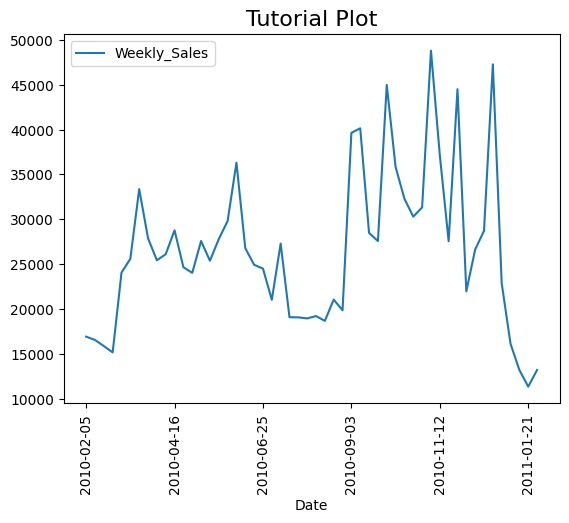

Number of Holiday Dates: 10
Holidays:
['2010-02-12' '2010-09-10' '2010-11-26' '2010-12-31' '2011-02-11'
 '2011-09-09' '2011-11-25' '2011-12-30' '2012-02-10' '2012-09-07']
Corresponding Holidays
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


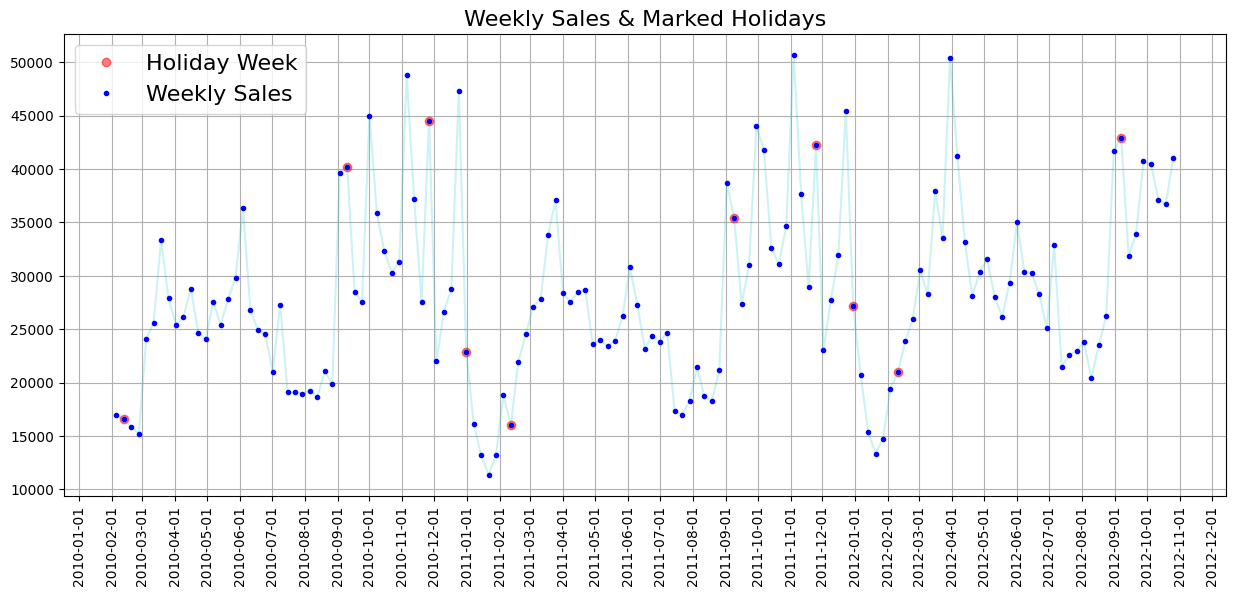

In [11]:

# Stop displaying all outputs for this cell only
%config InlineBackend.ast_node_interactivity='last_expr'

# First, sort values by date
data_store1_dept9 = data_store1_dept9.sort_values('Date' , ascending=True ).reset_index(drop=True)

# Then plot the weekly sales for the first 52 weeks, by setting the index to Date
data_store1_dept9[['Date', 'Weekly_Sales']].iloc[:52].set_index('Date').plot(rot=90);
plt.title('Tutorial Plot', fontsize=16) ;
plt.show()

print(f'Number of Holiday Dates: {data[data.IsHoliday].Date.nunique()}')
print('Holidays:')
print(data[data.IsHoliday].Date.unique())

print('Corresponding Holidays')
print('Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13')
print('Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13')
print('Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13')
print('Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13')
print('Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13')

plt.figure(figsize=(15,6));
plt.title('Weekly Sales & Marked Holidays', fontsize=16) ;

plt.plot( pd.to_datetime( data_store1_dept9[data_store1_dept9.IsHoliday].Date ), 
         data_store1_dept9[data_store1_dept9.IsHoliday].Weekly_Sales , 'or', alpha = .5 , label ='Holiday Week')

plt.plot( pd.to_datetime( data_store1_dept9.sort_values('Date').Date ), 
          data_store1_dept9.sort_values('Date').Weekly_Sales , '-c' , alpha = .2)

plt.plot( pd.to_datetime( data_store1_dept9.sort_values('Date').Date ), 
          data_store1_dept9.sort_values('Date').Weekly_Sales , '.b' , label ='Weekly Sales')

calends = [str(year) + '-' + str(month) + '-01' for year in np.arange(2010,2013) for month in np.arange(1,13)]
x_ticks = calends #+ list(data[data.IsHoliday].Date.unique())
x_ticks = pd.to_datetime(x_ticks)

plt.xticks( x_ticks , rotation = 90);
plt.grid();

plt.legend(loc='upper left' , fontsize=16) ;


❓ Question 2:

Do you have any hypotheses about the holidays' impact on the sales?

- It looks like holiday weeks don't all correspond to peaks. Some are troughs & some are peaks.
- Superbowl tends to be a trough following a peak. (2 of 3 times)
- Labour Day: A local peak.
- Thanksgiving: A local peak
- Christmas: It's a drop __following__ a peak.


**For the purpose of this notebook, we focus on the sales data from Store 1** that is saved in `train_store1.csv`. 

Let's read in the data.

In [12]:
df = pd.read_csv("../dat/train-store1.csv")

Let's work on extracting week, month, and year information from the `Date` column to be able to better manipulate the weekly data. Pandas comes with powerful capabilities to make this step easy. Reference: [tutorial
](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html). 

Before extracting the data, use `.dtypes` to check the datatype of the `Date` column. 

What's the difference between `df[['Date']]` and `df['Date']`?

### Question: What's the difference between `df[['Date']]` and `df['Date']`?
Answer: df['Date'] returns a pandas series. 'Date' is a string so it just returns the column.  
In contrast ['Date'] is a list. So multiple columns are expected to be returned.  
This means that `df[['Date']]` returns a dataframe.


In [13]:
print('Check the datatype of the `Date` column. Note: this was done earlier for all columns above.')
print( df['Date'].dtypes )
print( 'As output, this looks like: dtype(\'O\') ' )
print('This corresponds to an object type. Date is a string when ingested.')

print('\nFor reference, this is what a datetime series would return:')
print( pd.to_datetime(df['Date']).dtypes )


Check the datatype of the `Date` column. Note: this was done earlier for all columns above.
object
As output, this looks like: dtype('O') 
This corresponds to an object type. Date is a string when ingested.

For reference, this is what a datetime series would return:
datetime64[ns]


<details>
<summary>Expected Output</summary>
Date    object
dtype: object
</details>

Then, convert the Date column to a datetime object.

In [14]:
df.Date=pd.to_datetime(df.Date)

Verify that the `Date` column's datatype has changed as expected.

In [15]:
print('Column dtype: ')
print( df.Date.dtype )

print('\nUnique types for this column')
print( df.Date.apply( lambda x: type(x) ).unique() )

Column dtype: 
datetime64[ns]

Unique types for this column
[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


In [16]:
# Dervice Week, Month, & Year
df['week'] = df.Date.apply( lambda x: x.weekofyear )
df['month'] = df.Date.apply( lambda x: x.month )
df['year'] = df.Date.apply( lambda x: x.year )

Verify that now there are 19 columns in your DataFrame.

In [17]:
print(f'There are {len(df.columns)} in df.')

There are 19 in df.


❓ Question 3:

Last step before we look deeper into the features is to split the data set into training and testing datasets. 

Discuss: why do we want to perform EDA only on the training data, not the entire dataset? Shouldn't it be the more data the better?

The simple answer is that your end goal is to use the test set to estimate one or more models' performance on unseen data.  
If the test data isn't __unseen__ then that data is compromised in its purpose.  
By probing into the test data (in addition to the training data) during EDA, you're creating oppurtunities for bias & data leakage.  
For example, there may be interactions that are more strongly apparent in the test set. 
Seeing them could influence your feature engineering process. Or it could influence your model choice in addressing those issues.

The more complex answer is that typically things are not that simple.  
You definitely need to hold-out test data so that it remains unseen...but taking a simple random segment of your data and calling it "test" can cause plenty of problems too. There are many randomization techniques to make the train/test split, and many of them can fail depending on the nature of your data. 

So saying that the test set needs to remain "unseen" isn't the same as saying that you need to be totally ignorant about the nature of the test set.  
There are plenty of times where you need to know __something__ about the test data to ensure that there isn't bleed over.
- Ex. do you need to stratify the training, validation, and test data by some key factors? If so, you need to atleast know what those factors' values are.
- Ex. If you want to be sure that you don't have data from the train & test set from the same patient, then you atleast need to know the patient IDs of the test data.
- Ex. What if your slice of test data had all of the missing values or some flaw that makes it unrepresentative of __real__ unseen data, (e.g., because of some temporal factor of the data collection process)? Now your current test set isn't useful, so you need a new one...but you've thoroughly explored the training data now, so you can't just reshuffle and have an unseen test set. You should have done a little more homework on the data set before deciding how to make a train/validation/test set.

In summary, you need to seriously consider whether your EDA will compromise the core characteristic of your test set, which is that it hasn't been seen.  
This takes knowledge about the data set and the domain.

Split the data into training dataset (80%) and test dataset (20%). Use function `train_test_split` from `scikit-learn` ( a popular library for machine learning in Python ),  and set `random_state` to be 42 for reproducibility ( this is not the best way to do train-test-split due to the temporal nature of the data, however, we will ignore it for now).

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Reminder: df is loaded from "../dat/train-store1.csv" ... so maybe "train" in the file name is a misnomer.
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
print('Original set  ---> ',df.shape,
      '\nTraining set  ---> ',df_train.shape,
      '\nTesting set   ---> ', df_test.shape)

Original set  --->  (10244, 19) 
Training set  --->  (8195, 19) 
Testing set   --->  (2049, 19)


<details>
<summary>Expected Output</summary>

    ```
    Original set  --->  (10244, 19) 
    Training set  --->  (8195, 19) 
    Testing set   --->  (2049, 19)
    ```
</details>

## Task II: Target, Features, and Distributions

We inspected the datatype of column `Date`. Now, let's find datatypes for all columns in `df_train`.

In [21]:
df_train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object

<details>
<summary>Expected Output</summary>

```
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object
```
</details>

Summary statistics provide you with a general understanding of the data. Use method `.describe()`. By default it reports statistics mean, max, min, quantiles for numerical features and counts, unique, mode for categorical features.

In [22]:
pd.options.display.float_format = "{:,.2f}".format
df_train.describe()


Store     Dept  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
count 8,195.00 8,195.00      8,195.00     8,195.00    8,195.00   2,931.00   
mean      1.00    44.65     21,865.28        68.19        3.22   8,045.43   
std       0.00    29.95     27,970.00        14.16        0.43   6,484.49   
min       1.00     1.00       -863.00        35.40        2.51     410.31   
25%       1.00    20.00      3,502.09        57.79        2.76   4,039.39   
50%       1.00    38.00     10,357.32        69.64        3.29   6,154.14   
75%       1.00    72.00     31,647.36        80.48        3.59  10,121.97   
max       1.00    99.00    203,670.47        91.65        3.91  34,577.06   

       MarkDown2  MarkDown3  MarkDown4  MarkDown5      CPI  Unemployment  \
count   2,424.00   2,878.00   2,931.00   2,931.00 8,195.00      8,195.00   
mean    2,961.55   1,236.83   3,683.59   5,023.69   216.00          7.61   
std     8,032.30   7,830.99   5,849.69   3,303.07     4.33          0.38   
min         0.50       0.25       8.00     554.92   210.34          6.57   
25%        40.48       6.00     577.14   3,127.88   211.57          7.35   
50%       137.86      30.23   1,822.55   4,325.19   215.46          7.79   
75%     1,569.00     101.64   3,639.42   6,222.25   220.64          7.84   
max    46,011.38  55,805.51  32,403.87  20,475.32   223.44          8.11   

            Size     week    month     year  
count   8,195.00 8,195.00 8,195.00 8,195.00  
mean  151,315.00    25.89     6.47 2,010.96  
std         0.00    14.19     3.25     0.80  
min   151,315.00     1.00     1.00 2,010.00  
25%   151,315.00    14.00     4.00 2,010.00  
50%   151,315.00    26.00     6.00 2,011.00  
75%   151,315.00    38.00     9.00 2,012.00  
max   151,315.00    52.00    12.00 2,012.00

<details>
<summary>Expected Output</summary>

```
	Store	Dept	Weekly_Sales	Temperature	Fuel_Price	MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5	CPI	Unemployment	Size	week	month	year
count	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	2,931.00	2,424.00	2,878.00	2,931.00	2,931.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00
mean	1.00	44.65	21,865.28	68.19	3.22	8,045.43	2,961.55	1,236.83	3,683.59	5,023.69	216.00	7.61	151,315.00	25.89	6.47	2,010.96
std	0.00	29.95	27,970.00	14.16	0.43	6,484.49	8,032.30	7,830.99	5,849.69	3,303.07	4.33	0.38	0.00	14.19	3.25	0.80
min	1.00	1.00	-863.00	35.40	2.51	410.31	0.50	0.25	8.00	554.92	210.34	6.57	151,315.00	1.00	1.00	2,010.00
25%	1.00	20.00	3,502.09	57.79	2.76	4,039.39	40.48	6.00	577.14	3,127.88	211.57	7.35	151,315.00	14.00	4.00	2,010.00
50%	1.00	38.00	10,357.32	69.64	3.29	6,154.14	137.86	30.23	1,822.55	4,325.19	215.46	7.79	151,315.00	26.00	6.00	2,011.00
75%	1.00	72.00	31,647.36	80.48	3.59	10,121.97	1,569.00	101.64	3,639.42	6,222.25	220.64	7.84	151,315.00	38.00	9.00	2,012.00
max	1.00	99.00	203,670.47	91.65	3.91	34,577.06	46,011.38	55,805.51	32,403.87	20,475.32	223.44	8.11	151,315.00	52.00	12.00	2,012.0
```
</details>

In [23]:
display(df_train.head(3))

display(df_train.tail(3))

print('\nDescribe data frame\n')
df_train.describe()

print('\nPandas Profiling Report\n')
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile.to_widgets()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
4549      1    34 2010-02-26     12,005.00      False        46.63   
6496      1    52 2012-07-06      2,377.08      False        81.57   
550       1     4 2012-06-01     41,566.55      False        77.95   

      Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
4549        2.56        NaN        NaN        NaN        NaN        NaN   
6496        3.23  12,218.76      94.40     192.83   4,066.01   6,149.04   
550         3.50   6,086.21      12.00     370.51     148.75   3,690.85   

        CPI  Unemployment Type    Size  week  month  year  
4549 211.32          8.11    A  151315     8      2  2010  
6496 221.88          6.91    A  151315    27      7  2012  
550  221.75          7.14    A  151315    22      6  2012

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
5390      1    40 2012-07-27     53,286.98      False        82.66   
860       1     7 2010-02-19     19,985.20      False        39.93   
7270      1    60 2011-02-04      1,188.00      False        42.27   

      Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
5390        3.41   7,146.90     389.02       1.59  10,267.54   4,325.19   
860         2.51        NaN        NaN        NaN        NaN        NaN   
7270        2.99        NaN        NaN        NaN        NaN        NaN   

        CPI  Unemployment Type    Size  week  month  year  
5390 221.94          6.91    A  151315    30      7  2012  
860  211.29          8.11    A  151315     7      2  2010  
7270 212.57          7.74    A  151315     5      2  2011


Describe data frame



Store     Dept  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
count 8,195.00 8,195.00      8,195.00     8,195.00    8,195.00   2,931.00   
mean      1.00    44.65     21,865.28        68.19        3.22   8,045.43   
std       0.00    29.95     27,970.00        14.16        0.43   6,484.49   
min       1.00     1.00       -863.00        35.40        2.51     410.31   
25%       1.00    20.00      3,502.09        57.79        2.76   4,039.39   
50%       1.00    38.00     10,357.32        69.64        3.29   6,154.14   
75%       1.00    72.00     31,647.36        80.48        3.59  10,121.97   
max       1.00    99.00    203,670.47        91.65        3.91  34,577.06   

       MarkDown2  MarkDown3  MarkDown4  MarkDown5      CPI  Unemployment  \
count   2,424.00   2,878.00   2,931.00   2,931.00 8,195.00      8,195.00   
mean    2,961.55   1,236.83   3,683.59   5,023.69   216.00          7.61   
std     8,032.30   7,830.99   5,849.69   3,303.07     4.33          0.38   
min         0.50       0.25       8.00     554.92   210.34          6.57   
25%        40.48       6.00     577.14   3,127.88   211.57          7.35   
50%       137.86      30.23   1,822.55   4,325.19   215.46          7.79   
75%     1,569.00     101.64   3,639.42   6,222.25   220.64          7.84   
max    46,011.38  55,805.51  32,403.87  20,475.32   223.44          8.11   

            Size     week    month     year  
count   8,195.00 8,195.00 8,195.00 8,195.00  
mean  151,315.00    25.89     6.47 2,010.96  
std         0.00    14.19     3.25     0.80  
min   151,315.00     1.00     1.00 2,010.00  
25%   151,315.00    14.00     4.00 2,010.00  
50%   151,315.00    26.00     6.00 2,011.00  
75%   151,315.00    38.00     9.00 2,012.00  
max   151,315.00    52.00    12.00 2,012.00


Pandas Profiling Report



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

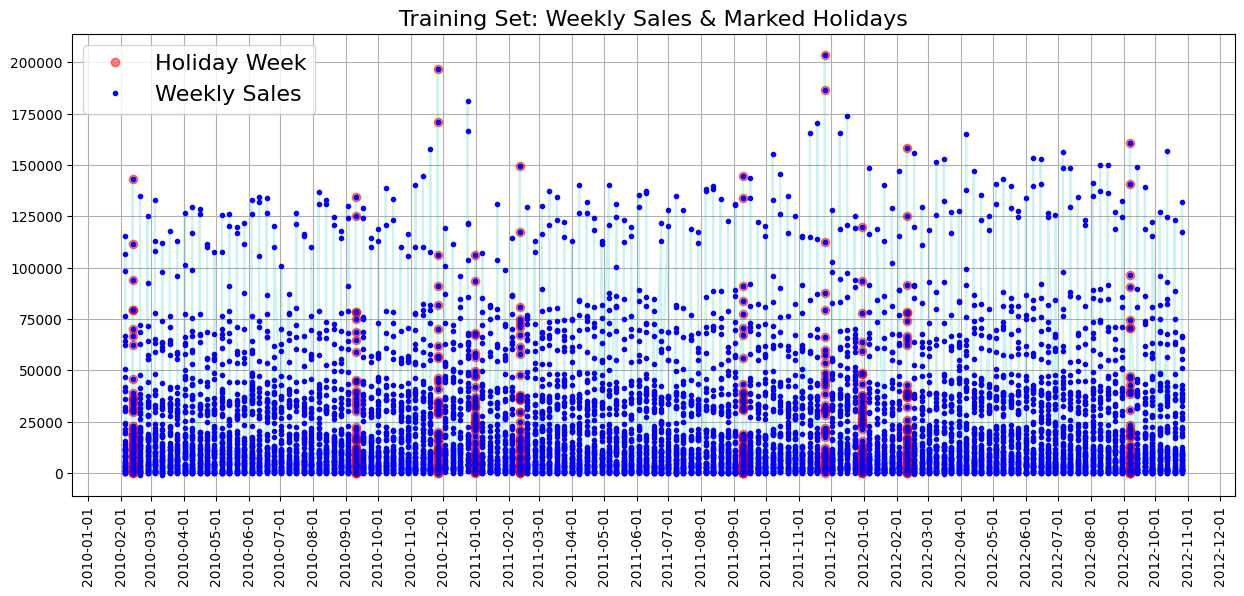

In [24]:
plt.figure(figsize=(15,6));
plt.title('Training Set: Weekly Sales & Marked Holidays', fontsize=16) ;

plt.plot( pd.to_datetime( df_train[df_train.IsHoliday].Date ), 
         df_train[df_train.IsHoliday].Weekly_Sales , 'or', alpha = .5 , label ='Holiday Week')

plt.plot( pd.to_datetime( df_train.sort_values('Date').Date ), 
          df_train.sort_values('Date').Weekly_Sales , '-c' , alpha = .2)

plt.plot( pd.to_datetime( df_train.sort_values('Date').Date ), 
          df_train.sort_values('Date').Weekly_Sales , '.b' , label ='Weekly Sales')

calends = [str(year) + '-' + str(month) + '-01' for year in np.arange(2010,2013) for month in np.arange(1,13)]
x_ticks = calends #+ list(data[data.IsHoliday].Date.unique())
x_ticks = pd.to_datetime(x_ticks)

plt.xticks( x_ticks , rotation = 90);
plt.grid();

plt.legend(loc='upper left' , fontsize=16) ;


❓ Question 4:

Inspect the output, what are some of your observations?

- Weekly sales has huge variation: Mean value is less that standard deviation.
- Weekly sales has has some erroneous values (Ex. Sales = -$863.00).
- There is probably a large departmental effect.
- The marginal distribution of weekly sales looks ~exponential.
- We're in a pretty warm climate. 75% of data > 58 degrees.
- We don't have the full year's picture for 2010 & 2012.
- Unsurprisingly, CPI has a strong negative correlation with MarkOffs & unemployment. And a strong positive correlation with gas price.

Are there any missing values? Use `.isna()` and `.sum()` to show the number of missing values from each column.

In [25]:
df_train.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

<details>
<summary>Expected Output</summary>

```
Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64
```
</details>

What do you think the target variable is in this problem? Assign the column name to `target` for later use.

In [26]:
# Well obviously we want to predict if it's Christmas using temperature & discounts. 
# Some people just don't wanna to look those Salvation Army bell-ringers in the eye as they walk into the store.
target = 'Weekly_Sales'

Visualize the distribution of target variable using `distplot()` from library `seaborn` ( Why seaborn? Check out a comparison between Matplotlib and Seaborn [here](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/) ). 

What do you observe visually that the output from `.desribe` was not making obvious? What is distribution of the target variable?

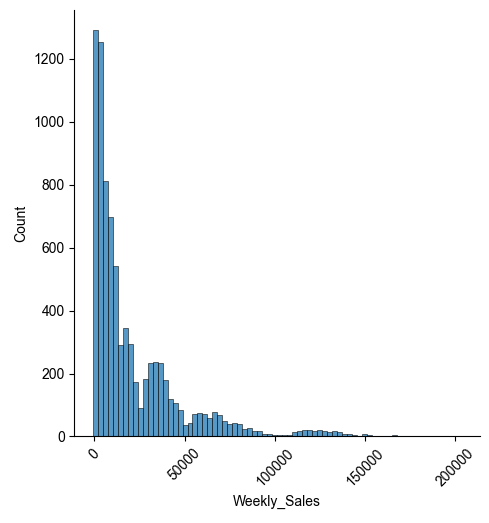

In [27]:
import seaborn as sns
sns.displot( df_train[target] )
plt.xticks(rotation=45) ;
sns.set(rc={'figure.figsize':(12,6)});

Notice that there exists nonpositive weekly sales. How many rows are there that the weekly sales are negative or 0?

In [28]:
# YOUR CODE HERE 
# HINT Sum of values less than or equal to 0 in training data
# Expected Output: 13

(df_train[target] <= 0).sum()

13

What percentage is the negative and zero sales?

In [29]:
# YOUR CODE HERE
# HINT if you think about target variable as a binary variable,
# with either negative and zero sales or positive sales,
# then the percentage of negative and zero sales is the percentage of 0s in the target variable
# which is the same as taking the average of the negative and zero sales

print(f'There are {len(df_train)} total observations = {100*len(df_train)/len(df_train)} percent.')
print(f'There are { (df_train[target] <= 0).sum() } observations less than or equal to zero = {100* (df_train[target] <= 0).sum() / len(df_train)} percent.')
print(f'There are { (df_train[target] == 0).sum() } observations equal to zero = {100* (df_train[target] == 0).sum() / len(df_train)} percent.')
print(f'There are { (df_train[target] < 0).sum() } observations less zero = {100* (df_train[target] < 0).sum() / len(df_train)} percent.')

print( f'\nThe zero sales are { 100* (df_train[target] == 0).sum() / (df_train[target] <= 0).sum() } percent of the negative & zero sales' )
print( f'The zero sales are { 100*2/13 } percent of the negative & zero sales' )


There are 8195 total observations = 100.0 percent.
There are 13 observations less than or equal to zero = 0.1586333129957291 percent.
There are 2 observations equal to zero = 0.024405125076266018 percent.
There are 11 observations less zero = 0.1342281879194631 percent.

The zero sales are 15.384615384615385 percent of the negative & zero sales
The zero sales are 15.384615384615385 percent of the negative & zero sales


<details>
<summary>Expected Output</summary>

`0.0015863331299572911` or `0.16%`
</details>

After communicating your findings, the stakeholders confirm that you can remove these data entries for now and they are launching an investigation with data analysts and data engineers. 

Now remove the negative and zero sales from the training dataset.

In [30]:
print( f'Before removal: {df_train.shape}')
mask = df_train[target] > 0
df_train = df_train[mask].reset_index(drop=True)
print( f'After removal: {df_train.shape}')
df_train.shape # Expected Output: (8182, 19)

Before removal: (8195, 19)
After removal: (8182, 19)


(8182, 19)

Let's move on to feature engineering. 

Although almost all the features are numerical, should they all be treated as numerical features? Let's inspect the number of unique values. 

What does this tell you?

In [31]:
pd.DataFrame([ (col, df[col].nunique() , df[col].dtype ) for col in df_train.columns] , columns = ['Feature', 'Nunique', 'dtype'])

Feature  Nunique           dtype
0          Store        1           int64
1           Dept       77           int64
2           Date      143  datetime64[ns]
3   Weekly_Sales    10042         float64
4      IsHoliday        2            bool
5    Temperature      143         float64
6     Fuel_Price      137         float64
7      MarkDown1       51         float64
8      MarkDown2       41         float64
9      MarkDown3       49         float64
10     MarkDown4       51         float64
11     MarkDown5       51         float64
12           CPI      143         float64
13  Unemployment       12         float64
14          Type        1          object
15          Size        1           int64
16          week       52           int64
17         month       12           int64
18          year        3           int64

## Question: What does this tell you?
- Store is a fixed value & categorical, so it's not a numerical feature.
- Dept has 77 values & categorical, so it's not a numerical feature.
- Week of the year might helpfully capture inter-week & seasonal variation. But for ease it might be treated as a category.
- Temperature, Fuel_Price, CPI, and unemployment rate are continuous variables.
- Size is continous but only has 1 value.


`Temperature`, `CPI`, `Unemployment`, `Fuel_Price` are continuous variables. Those tie to the second business objective of looking into the effects from different external factors on weekly sales. 

Put these four features into a list and store it in `external_factors`. 

Earlier we noticed that `MarkDownx` columns contain some missing values, so we will focus on them in a later task. 

In [32]:
external_factors = ['Temperature','CPI','Unemployment', 'Fuel_Price']

Plot `Temperature` using a box plot.

Hint: Set the figure size as (6, 4), and turn off the grid.

❓ Question 5:

Visualize `Temperature` in a box plot, what do you think the advantage of a box plot over histogram? 

If you wanted to have a graph that directly showed the data's median, quartiles, range then the box plot might be helpful.
However you can also just plot the qualtiles of interest in the histogram as shown below.

One other advantage of boxplots is that they work nicely with categorical varaibles, so you can compare the outcome across different categories.  
Ex. It wasn't requested here, but we could easily compare the temperature distribution across all 12 months. 
A histrogram would jumble this because of the heavy overlap in the X-axis. (The violin plot would then resolve this issue.)

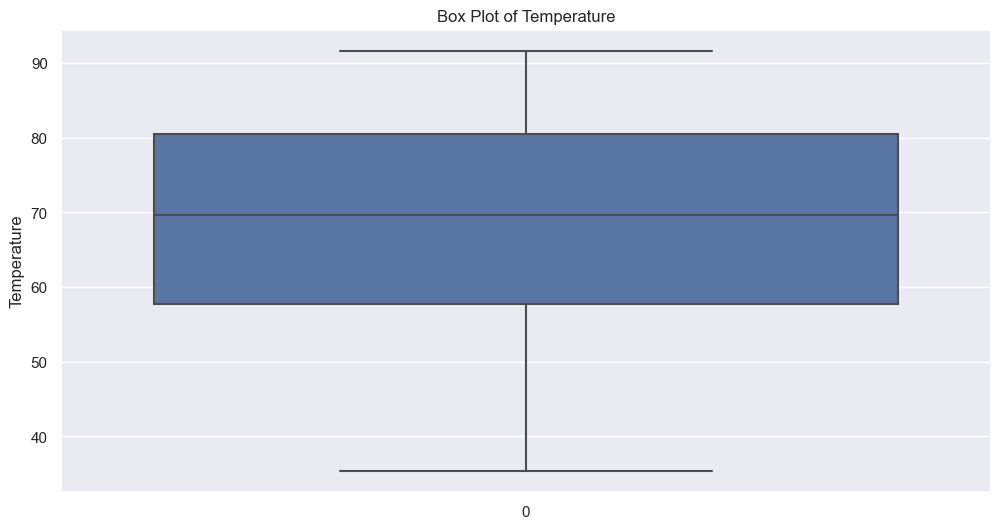

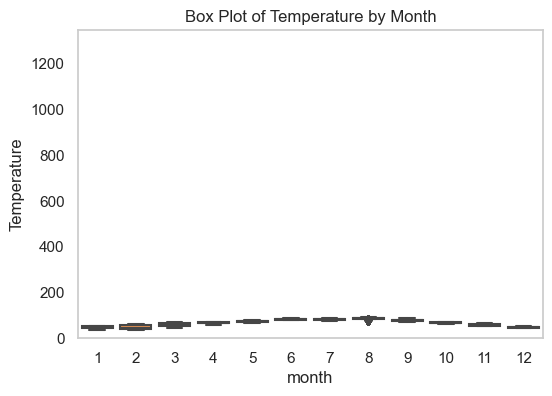

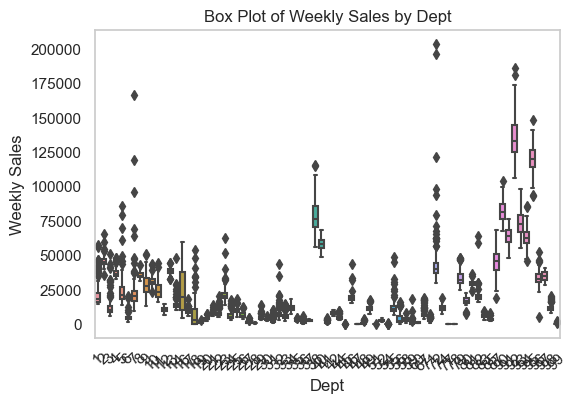

In [33]:
# Requested box plot
sns.boxplot( df_train.Temperature )
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Temperature');
plt.title('Box Plot of Temperature')
plt.show();

# Histogram for comparison
plt.figure( figsize=(6,4) );
plt.hist( df_train.Temperature , np.arange(0,100,5) ) ;
plt.xlabel('Temperature');
plt.title('Histogram of Temperature');

temp_quantiles= df_train.Temperature.quantile([0,.25,.5,.75,1]).values;
plt.plot( temp_quantiles , 0*temp_quantiles, '^r', markersize=10);

# Boxplot: Month x Temp
sns.boxplot( x = 'month' ,  y = 'Temperature' , data = df_train )
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Temperature');
plt.title('Box Plot of Temperature by Month')
plt.show();

# Boxplot Dept x Sales
sns.boxplot( x = 'Dept' ,  y = 'Weekly_Sales' , data = df_train )
sns.set(rc={'figure.figsize':(50,5)})
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Weekly Sales');
plt.title('Box Plot of Weekly Sales by Dept')
plt.xticks(rotation=45) ;
plt.show();

Plot all four numerical features using both distribution plot and box plot. Note any observations.

                                 Numeric Features Distribution                                  


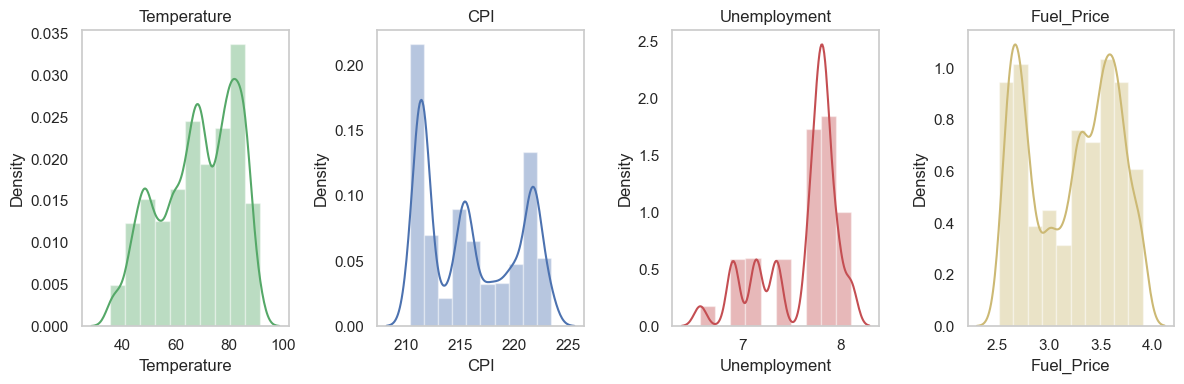

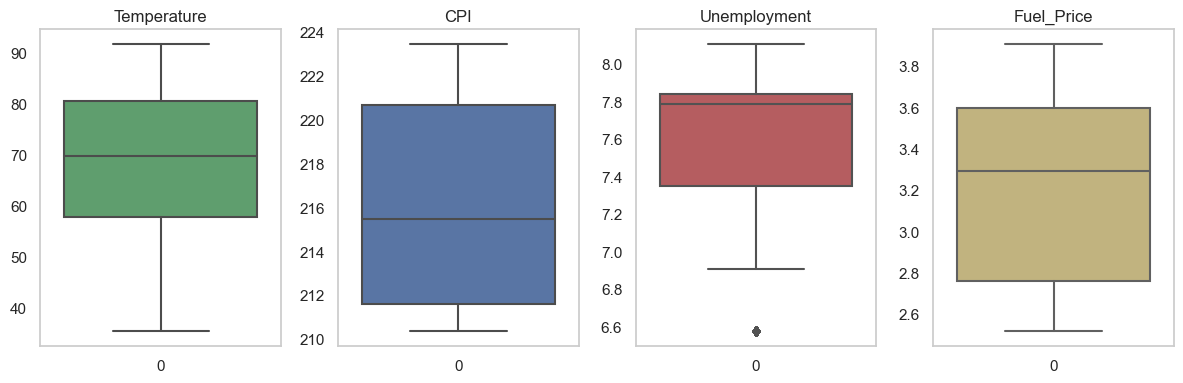

In [34]:
# import matplotlib.pyplot as plt # already imported at the begining
print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(external_factors)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df_train[external_factors[i]],
                 bins=10, 
                 color = colors[i])
    plt.title(external_factors[i])
plt.tight_layout();


# boxplot
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.boxplot(df_train[external_factors[i]], 
                 color = colors[i])
    plt.title(external_factors[i])
plt.tight_layout();



We will investigate the impacts of the external factors later. Now let's scan through the other features.

`Store`, `Type`, and `Size` each have only one unique value, offering no information, so we can safely ignore them. 

We extracted `year`, `month`, and `week` from  `Date`, thus `Date` is redundant; but it is easy to find the date range in the training dataset using `Date`:

In [35]:
df_train['Date'].min(), df_train['Date'].max() 
# Expected Output: (Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

Our training data ranges from 5th of February 2010 to 26th of October 2012.

It makes more sense to treat `year`, `month`, `week` as categorical variables, and even more accurately ordinal variables. 

The boolean feature `IsHoliday` can be considered categorical, and so can `Dept`. 

Let's put these column names into a list `categoricalFeatures`.

In [36]:
categoricalFeatures = ['year','month','week','IsHoliday', 'Dept']

For the categorical features, we are interested in the frequency of each value. 
Use `pandas` method `value_counts` to find the number of rows where `IsHoliday` is true and false respectively.

In [37]:
# YOUR CODE HERE
df_train.IsHoliday.value_counts()

False    7586
True      596
Name: IsHoliday, dtype: int64

<details>
<summary>Expected Output</summary>

```
False    7586
True      596
Name: IsHoliday, dtype: int64
```
</details>

Visualize the distribution of `month`; use `sns.countplot()`.

<AxesSubplot: xlabel='month', ylabel='count'>

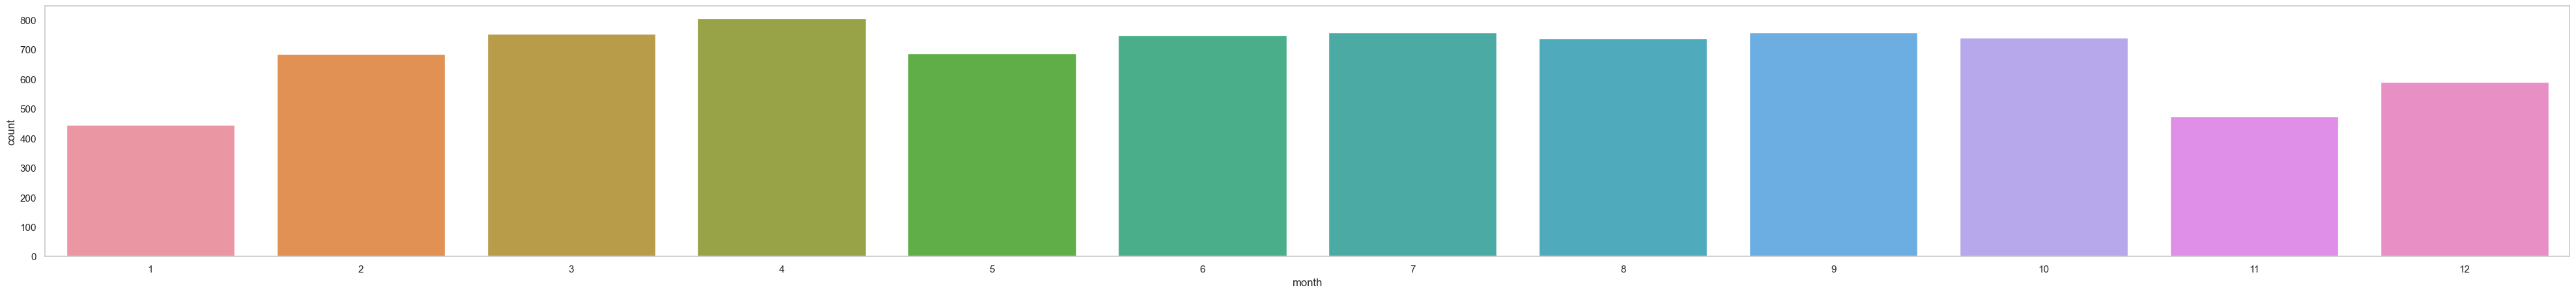

In [38]:
# YOUR CODE HERE
sns.countplot( x = df_train.month )

Next, let's look into some plots of categorical features. 

                               Visualising Categorical Features:                                


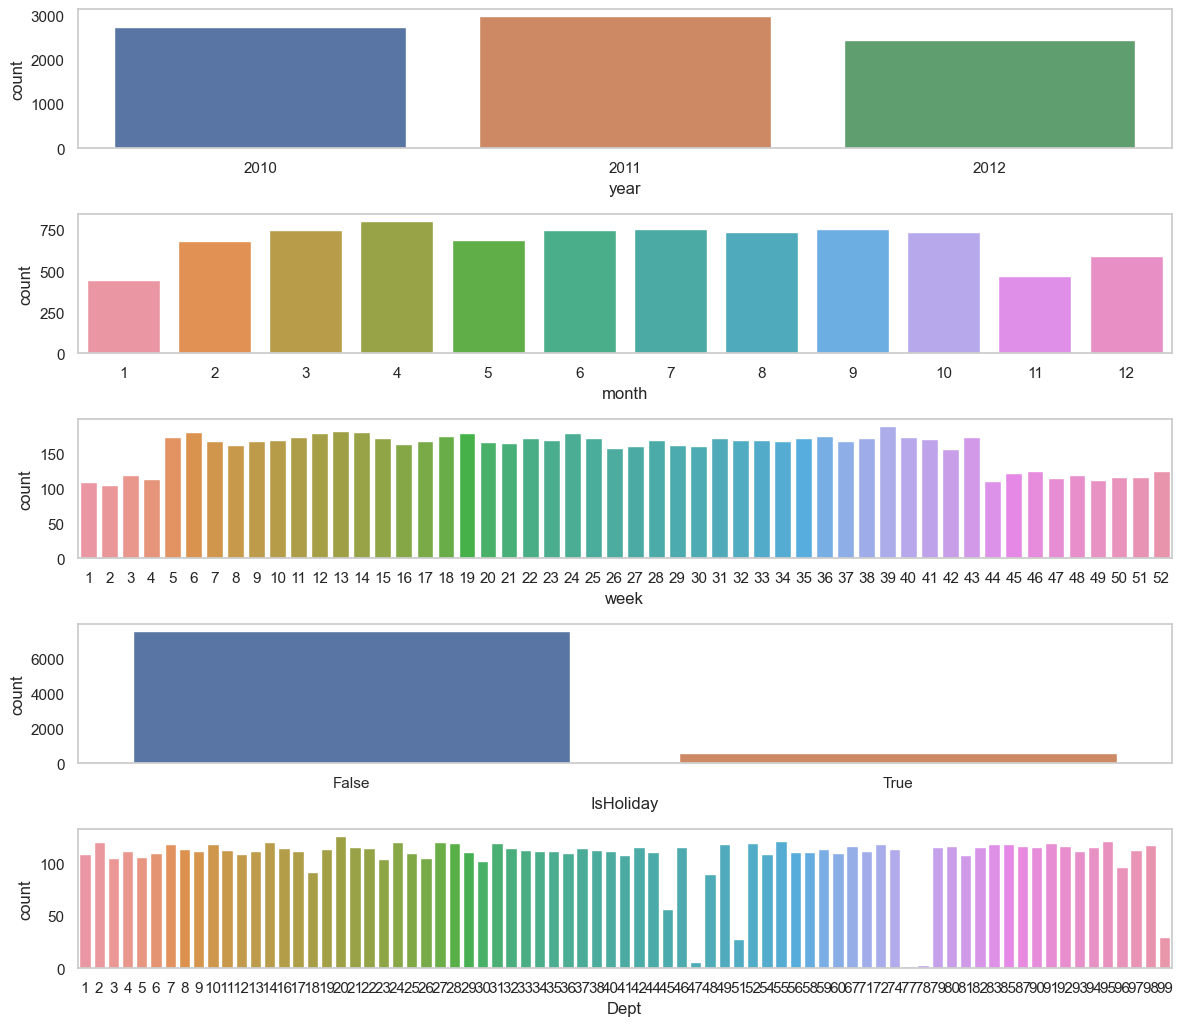

In [39]:
#Visualizing the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))

for i in range(len(categoricalFeatures)):
    plt.subplot(6,1,i+1)
    sns.countplot( x = df_train[categoricalFeatures[i]])
plt.tight_layout();

❓ Question 6: 

Discuss with your pair programming partner: 

There is less data in 2012 than the previous two years. Did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?

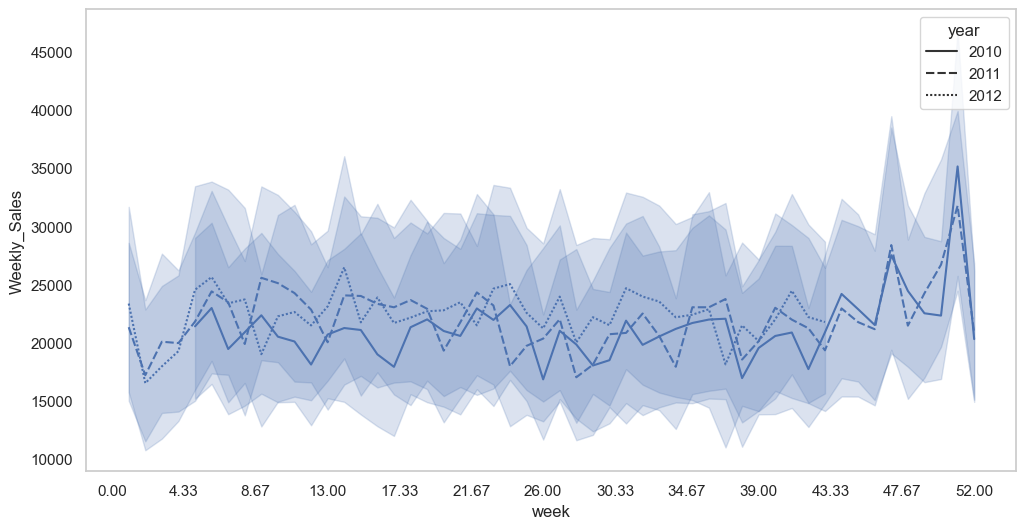

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_train, x="week", y="Weekly_Sales",  style='year');
plt.xticks(np.arange(0,53, 52/12 ));

Yes, the year's missing months do affect data availability.  
We have 1/3 less data for January, last week of October, November, and December.   
So there's more uncertainty around this seasonal effect, especiialy because they are contiguous months (albeit not in contiguous years).

## Task III: Impact from Holidays

The first business objective is to understand the impact of holidays on weekly sales. 

There is a feature `IsHoliday` that we can use to calculate the average weekly sales for holiday weeks and non-holiday weeks. 

For this purpose, we can use `.groupBy` and `.mean()`. Are holiday sales higher?

In [41]:
df_train.groupby('IsHoliday').Weekly_Sales.mean()

IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64

<details>
<summary>Expected Output</summary>

```
IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64
```
</details>


But we would like to understand it at more granular level. Remember [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox)? To save some time,  date mapping are identified for the training data

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

We provided the code to create a flag for each holiday to help you analyze weekly sale by each holiday type.

In [42]:
superbowl_mask = df_train['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10'])
laborday_mask = df_train['Date'].isin(['2010-09-10', '2011-09-09','2012-09-07'])
thanksgiving_mask = df_train['Date'].isin(['2010-11-26', '2011-11-25'])
christmas_mask = df_train['Date'].isin(['2010-12-31', '2011-12-30'])

In [43]:
df_train['superbowl'] = superbowl_mask
df_train['laborday'] = laborday_mask
df_train['thanksgiving'] =thanksgiving_mask
df_train['christmas'] = christmas_mask

Run the next cell to see:

1. how many weekly sales happened on Christmas (does it make sense? what did we not account for?)
2. what is the average weekly sales stratified by whether it is Christmas week or not?

In [44]:
df_train.groupby(['christmas'])\
        .agg(count = ('christmas', 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))

count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56

## What didn't we account for?
(By the way, it's not clear if this is a required question or just a prompt. Or is this another thing to discus with my partner.)  
What this doesn't account for is people buying Christmas gifts early...like my mom. She starts in mid-February. The week after my birthday.

Perform the same analysis for the other three holidays:

In [45]:
holidays = ['superbowl', 'laborday', 'thanksgiving', 'christmas']
for holiday in holidays:
    summary_stats = df_train.groupby([holiday]
                                     ).agg(count = (holiday, 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))
    print(summary_stats)
    print()

           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56



<details>
<summary>Expected Output</summary>

```
           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56
```
</details>


Without hypothesis testing and only by eyeballing, it seems like Super Bowl and Thanksgiving have a positive impact on the weekly sales for store 1 in the training dataset. 

Discuss with your teammate, are you surprised that during Christmas, sales at Walmart did not go up? Holiday effect, if causal, happened most during Thanksgiving weeks. Is this something you expected?

We have been ignoring `Dept`, let's take a look at the plot below showing the weekly sales by department in 2011. 

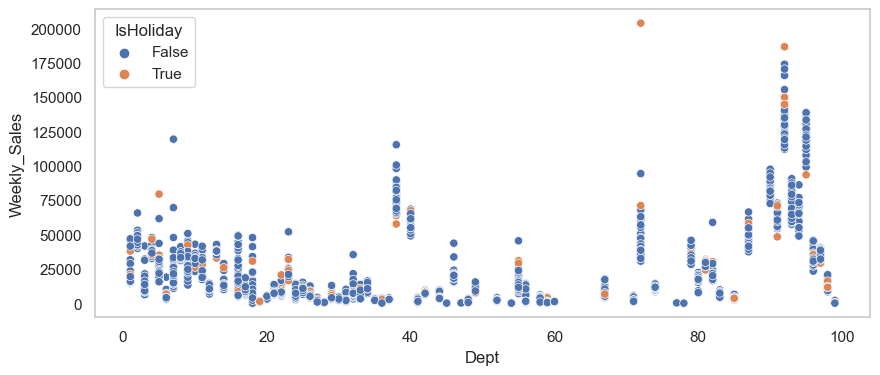

In [46]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_train[df_train.year==2011], x = 'Dept', y= target, hue='IsHoliday');

Dept 72 has a very unusual high weekly sales during the holiday week, but we will need more data to understand if this is data issue, outlier, or special event. 

## Task IV: Visualize Relationship between Macroeconomic & External Factors and Sales

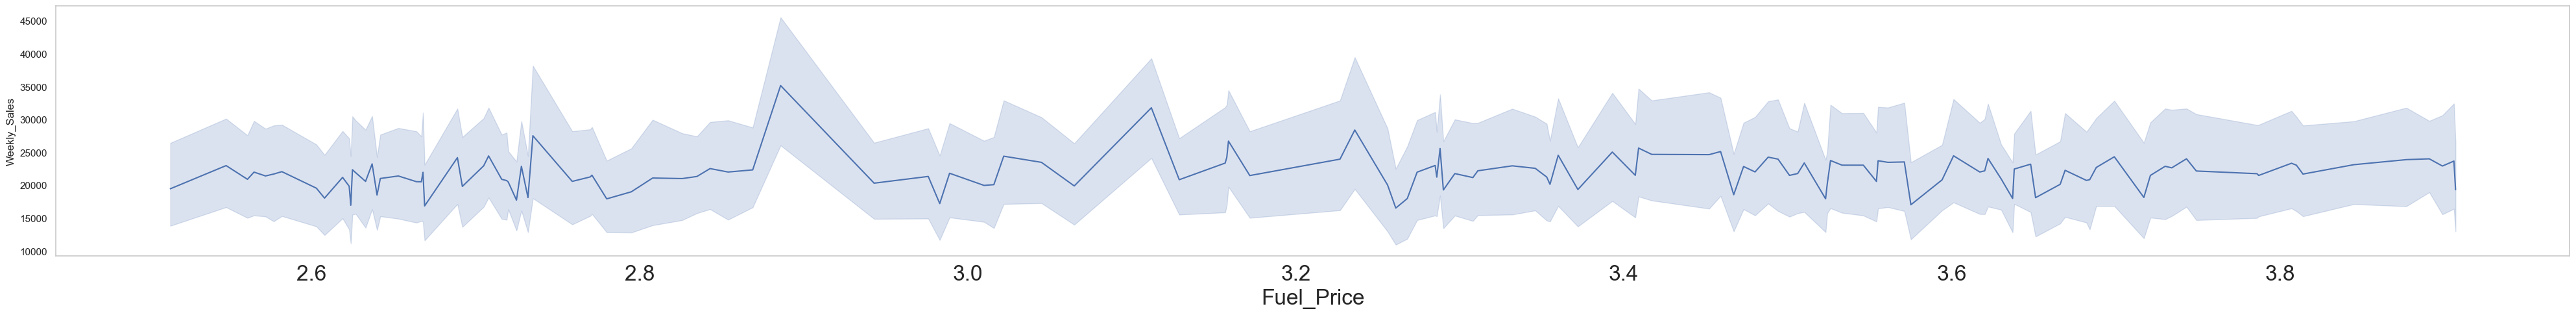

In [47]:
sns.lineplot(data=df_train, x="Fuel_Price", y="Weekly_Sales");
plt.xticks(fontsize=24);
plt.xlabel( "Fuel_Price" , fontsize=24);

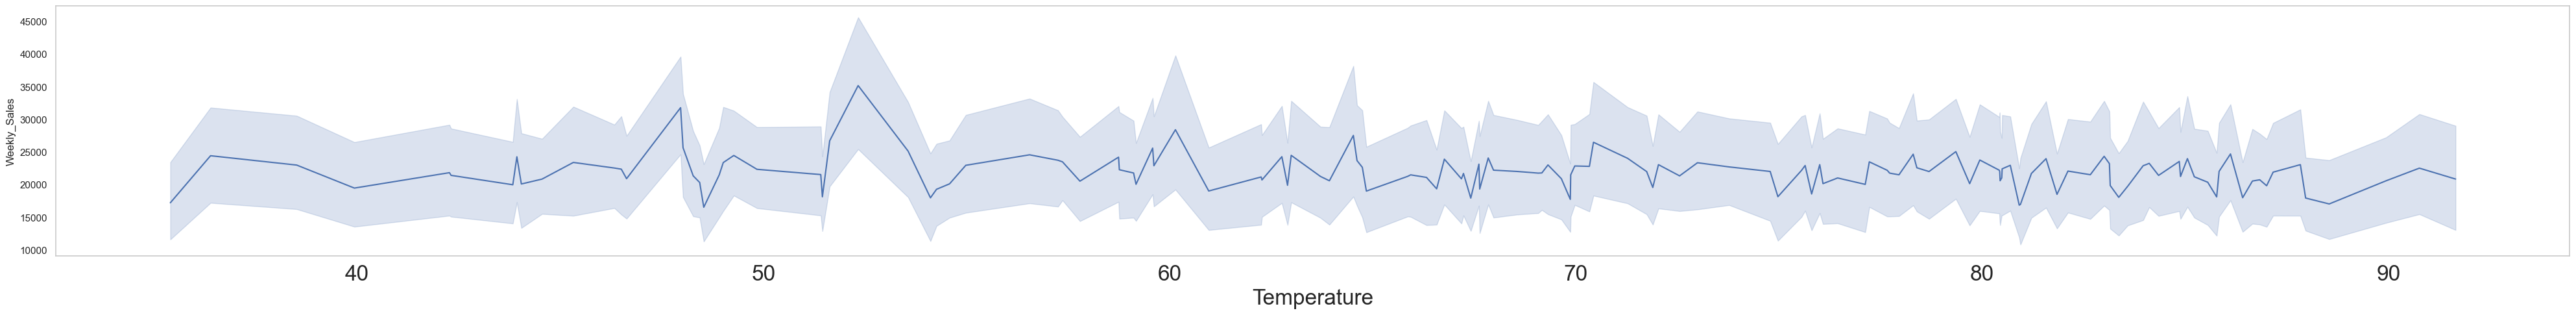

In [48]:
sns.lineplot(data=df_train, x="Temperature", y="Weekly_Sales");
plt.xticks(fontsize=24);
plt.xlabel( "Temperature" , fontsize=24);

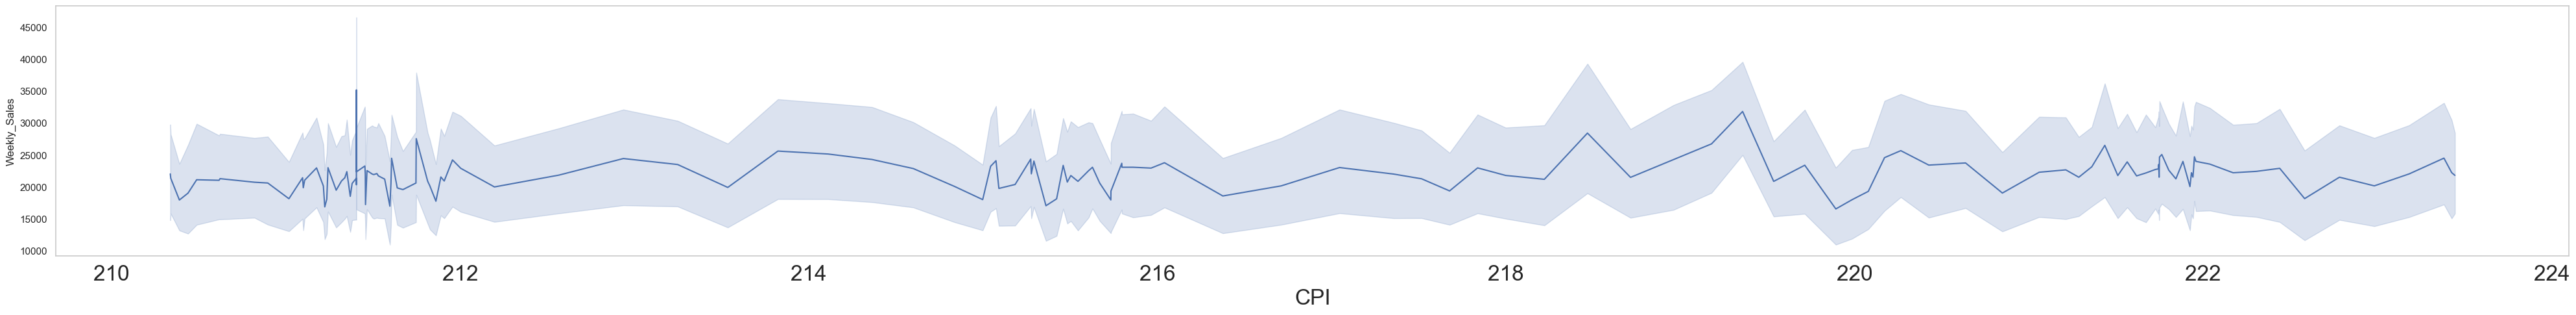

In [49]:
sns.lineplot(data=df_train, x="CPI", y="Weekly_Sales");
plt.xticks(fontsize=24);
plt.xlabel( "CPI" , fontsize=24);

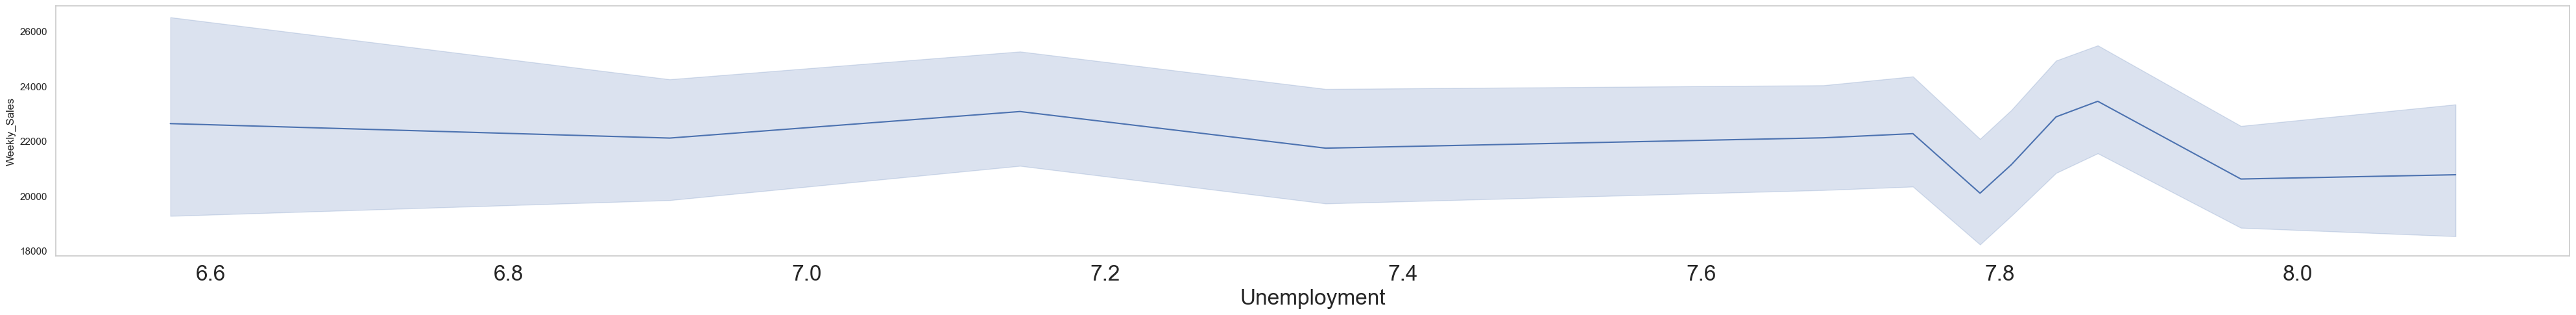

In [50]:
sns.lineplot(data=df_train, x="Unemployment", y="Weekly_Sales");
plt.xticks(fontsize=24);
plt.xlabel( "Unemployment" , fontsize=24);

By eyeballing, do you find strong evidence that these external and macroeconomic factors are correlated with Walmart's weekly sales? Do you think `lineplot` is an appropriate plot to visualize this relationship?

### Answer
No, it's not a good plot, stand alone. The departmental effect is very strong, so you'd need to adjust for this before attempting to draw inferences.
You could either plot by department, use a different plot, or check out a model output that attempts to simultaneously adjust for these different factors.

Lastly, we calculate the spearman correlations between the target and the external factors to verify that there is no strong linear correlation between the target variable and these features.

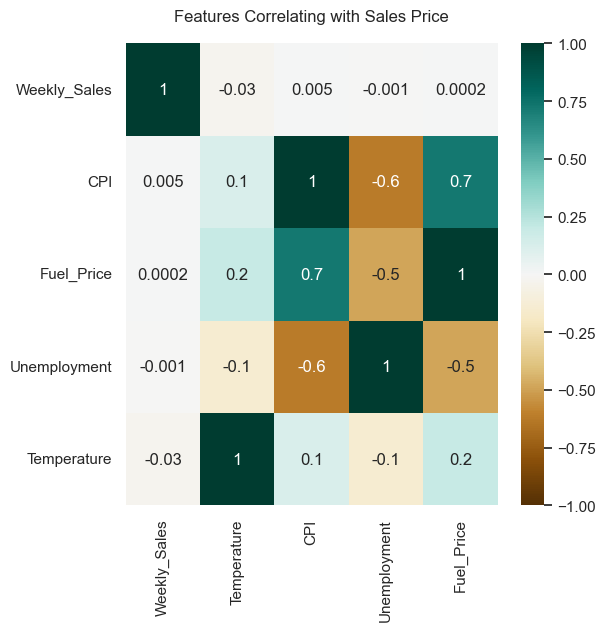

In [51]:
plt.figure(figsize=(6, 6))
df_train_reduced = df_train[[target] + external_factors]
corr = df_train_reduced.corr(method='spearman')
heatmap = sns.heatmap(corr.sort_values(by=target, ascending=False),
                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

## Task V: Feature Engineering

"*Feature Engineering encapsulates various data engineering techniques such as selecting relevant features, handling missing data, encoding the data, and normalizing it. It is one of the most crucial tasks and plays a major role in determining the outcome of a model.*" [Ref](https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/).

One part of feature engineering is to create new features from the given data, like the `thanksgiving` column that was earlier derived from `Date`. 

Common techniques for tabular data include adding summary statistics of the numerical features such as mean and standard deviation, and creating new features from the interaction of multiple features, etc. 

In this task, we will work on handling missing data, normalizing numerical features, and encoding categorical features. 

First, let's focus on missing data. Missing value treatment is crucial, yet not trivial. Take a read on [Tackling Missing Value in Dataset](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) for detailed explanation. Features with nulls or wrong values (e.g., negative fuel price) needs to be imputed or removed. 

- Do you want to keep the features with missing value? Discuss the trade offs with your teammate.
- If the answer to the first question is yes, then how do you want to impute them? Discuss the trade offs with your teammate.

From the earlier steps, we observed that only the markdown columns contain missing values, however we do not have more information on what those columns represent exactly.  

In [52]:
df_train.columns[df_train.isna().sum() != 0]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')

For each column, find out the percentage of the data is missing.

In [53]:
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    perc_missing =  df_train[col].isnull().sum() / len(df_train) # btw this is the proportion missing, not the percent.
    print (f'{col}: {perc_missing:.0%} is missing')

MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing


<details>
<summary>Expected Output</summary>

```
MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing
```
</details>


The majority of the markdown fields are missing. This is where, again, we need to communicate with the stakeholders to understand what the data measure, how the data was collected and then determine our strategy from there. Since we want to understand the impacts of `MarkDownx` on weekly sales, we will keep the features and impute the missing values.  We have learned that there are tradeoffs with how we treat missing values and that our choice of imputation can be significantly impacted by extreme values and the amount of the missing data.  We choose to impute with the median here to mitigate these negative impacts. Use `.fillna()` to impute the missing values.

In [54]:
df_train.fillna(df_train.median(), inplace=True)



In [55]:
(df_train.isna().sum() != 0).sum() # sanity check: 0

0

Visualize the distributions for those markdown fields after imputations, are they normal?

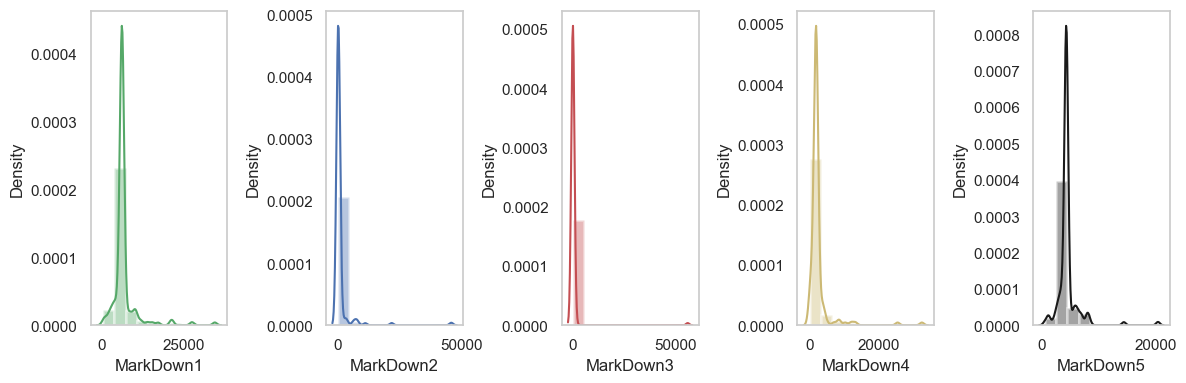

In [56]:
plt.figure(figsize=figsize)
for i in range(len(md_cols)):
    plt.subplot(1,len(md_cols),i+1)
    sns.distplot(df_train[md_cols[i]],
                 hist_kws=dict(linewidth=2),
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

Note that missing values are different from outliers. Outliers, on the other hand, are feature values that are rare in nature. They can unncessarily skew the data and cause problem for modeling. Outlier treatment involves removing or imputing such values. One popular approach to identify outliers is IQR; that is, data points that lie 1.5 times of IQR above Q3 (third quartile) and below Q1 (first quartile) are outliers. Take a read on [Detecting and Treating Outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). 

We will leave it as an optional exercise for you to identify outliers using IQR, and replace the outliers with the median.

Now let's see how we can normalize the data. For numerical features it means scaling the features to be of similar range. This step is crucial for machine learning algorithms that calculate distances between data (e.g., read [The Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

For this task, let's keep `Temperature` from the external features, since it is the most linearly correlated with the target variable, though very weak and negative. 

In addition, we include one markdown field. Since neither seems to follow normal distributions, it is safer to use `MinMaxScaler` from `sklearn.preprocessing` to transform features by scaling each feature to a given range (See discussion on [Normalization vs Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

In [57]:
from sklearn.preprocessing import MinMaxScaler

numericalFeatures = ['Temperature', 'MarkDown1']
df_train_num = df_train[numericalFeatures]

In [58]:
df_train_num.describe() # Check the summary statistics

Temperature  MarkDown1
count     8,182.00   8,182.00
mean         68.19   6,828.42
std          14.16   3,981.30
min          35.40     410.31
25%          57.79   6,154.14
50%          69.64   6,154.14
75%          80.48   6,154.14
max          91.65  34,577.06

Instantiate a MinMaxScaler and fit using `df_train_num`:

In [59]:
scaler = MinMaxScaler(feature_range=(0, 1))


Now transform training data `df_train_num` and store the resulting nparray in `train_norm`:

In [60]:
scaler.fit(df_train_num) # scale "fits" to the dataframe
train_norm = scaler.transform(df_train_num) 

MinMaxScaler()

Verify that both columns now have minimum 0 and maximum 1. 

In [61]:
pd.DataFrame(train_norm, columns=df_train_num.columns).describe()

Temperature  MarkDown1
count     8,182.00   8,182.00
mean          0.58       0.19
std           0.25       0.12
min           0.00       0.00
25%           0.40       0.17
50%           0.61       0.17
75%           0.80       0.17
max           1.00       1.00

Let's turn to categorical fatures. So far most Python packages for modeling do not accept strings as an input. Thus, encoding the categorical value to numerical value is a necessary step. Here, let's apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) on `Dept` and `IsHoliday`:

In [62]:
from sklearn.preprocessing import OneHotEncoder
categoricalFeatures = ['Dept', 'IsHoliday']
df_train_cat = df_train[categoricalFeatures]
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False).fit(df_train_cat)

Transform the categorical features using one hote encoding `ohe`. 

In [63]:
train_ohe = ohe.transform( df_train_cat[['Dept', 'IsHoliday']] )

In [64]:
display( train_ohe )

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [65]:
train_ohe.shape, df_train_cat.shape # Expected Output: ((8182, 79), (8182, 2))


((8182, 79), (8182, 2))

The number of columns explodes from 2 to 79. 

Lastly we merge the processed numerical features with the processed categorical features using `hstack` in `numpy`:

In [66]:
import numpy as np
X_train = np.hstack([train_norm, train_ohe])
display( pd.DataFrame(X_train) )

0    1    2    3    4    5    6    7    8    9   ...   71   72   73  \
0    0.20 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
1    0.82 0.35 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
2    0.76 0.17 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
3    0.81 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
4    0.68 0.23 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8177 0.19 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
8178 0.89 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
8179 0.84 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
8180 0.08 0.17 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00  ... 0.00 0.00 0.00   
8181 0.12 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   

       74   75   76   77   78   79   80  
0    0.00 0.00 0.00 0.00 0.00 1.00 0.00  
1    0.00 0.00 0.00 0.00 0.00 1.00 0.00  
2    0.00 0.00 0.00 0.00 0.00 1.00 0.00  
3    0.00 0.00 0.00 0.00 0.00 1.00 0.00  
4    0.00 0.00 0.00 0.00 0.00 1.00 0.00  
...   ...  ...  ...  ...  ...  ...  ...  
8177 0.00 0.00 0.00 0.00 0.00 1.00 0.00  
8178 0.00 0.00 0.00 0.00 0.00 1.00 0.00  
8179 0.00 0.00 0.00 0.00 0.00 1.00 0.00  
8180 0.00 0.00 0.00 0.00 0.00 1.00 0.00  
8181 0.00 0.00 0.00 0.00 0.00 1.00 0.00  

[8182 rows x 81 columns]

In [67]:
X_train.shape # sanity check: (8182, 81)

(8182, 81)

What about the test data?

Yes, you need to apply the same data processing. But be careful for the data leakage! 

We spare some copy + paste + edit and see how this can be done when we introduce `pipeline` next. 

## Task VI: Pipeline

Even with less than 20 features in our dataset, there are many possibilities that you can do when preprocessing the data. 

There is no one-fits-all approach; often you will find yourself experimenting with many combinations to achieve better modelling performance: Should I apply normalization or standardization? Do I remove the outliers or should I impute them? Do I impute the missing values with median or mean or 0? Answers to many of these questions is "It depends." (Have you heard [Graduate Student Descent](https://sciencedryad.wordpress.com/2014/01/25/grad-student-descent/)?) That means trial-and-error and it is not efficient to produce a notebook each time when you need to try something slightly different. You will get lost quickly. `Pipeline` is one useful tool. 

Not only does `Pipeline` help streamline the process, and keeps the code modular, but also reduces the possibility of introducing errors and bugs. 

In this task, we build the pipeline following the strategies used in the last task, run a simple linear regression model, and print out the model's performance. Note that there is minimal code required for you to implement, the key is to understand each step.

To avoid confusion, let's read the data again directly from `train-store1.csv`.

In [68]:
df = pd.read_csv('../dat/train-store1.csv')

In [69]:
df.shape

(10244, 16)

Separating the target `y` from the features `X`:

In [70]:
X, y = df.drop(columns=target), df[target]

Import `Pipeline` from submodule `sklearn.pipeline`

In [71]:
from sklearn.pipeline import Pipeline

Now we build a data transformation for numerical features following two steps: impute the missing values with the feature median (use `SimpleImputer`), followed by normalization (use `MinMaxScaler`). 

Note - do not confuse "transformers" that are part of data preprocessing with the deep learning models with the same name.

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['CPI', 'MarkDown1']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    ('scaler', MinMaxScaler())
])

For categorical features, we apply one hot encoding `OneHotEncoder` ( there are many other options; see [Scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) ):

In [73]:
categorical_features = ['Dept', 'IsHoliday']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Piece the `numeric_transformer` and `categorical_transformer` using `ColumnTransformer`:

In [74]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Lastly, let's append the regression model to preprocessing pipeline to complete a full prediction pipeline.

In [75]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

The pipeline has been built! The rest is to 
- split the data into training and testing sets
- apply the pipeline to the training data
- obtain the prediction performance on testing data

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's run the prediction!

In [77]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CPI', 'MarkDown1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dept', 'IsHoliday'])])),
                ('model', LinearRegression())])

In [78]:
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.949


Optional: Discuss what type of [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) strategy you would use to select the features.

## Automating EDA

In this exercise, you have learned the manual way to perform EDA.  Doing EDA manually has the benefits of customization, but is also highly repetitive.  For this reason, a lot of EDA can easily be automated!  In automating our EDA, we can get to know our data more quickly and spend more time on feature engineering and modeling.  Let's check out a library called [SweetViz](https://github.com/fbdesignpro/sweetviz) to see how we can automate EDA! 

                                             |          | [  0%]   00:00 -> (? left)


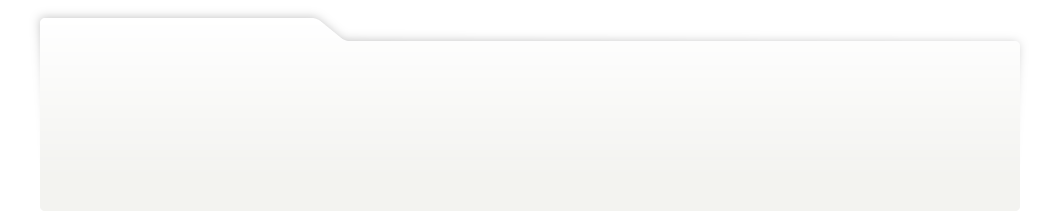
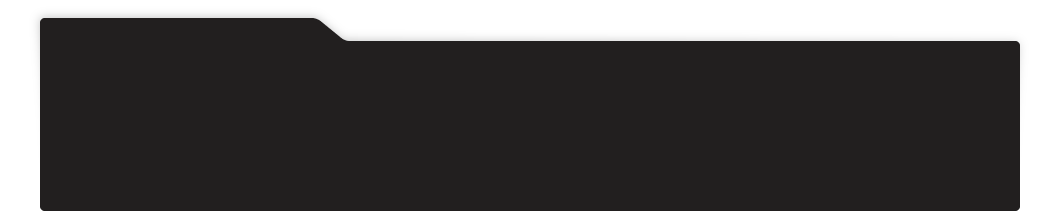
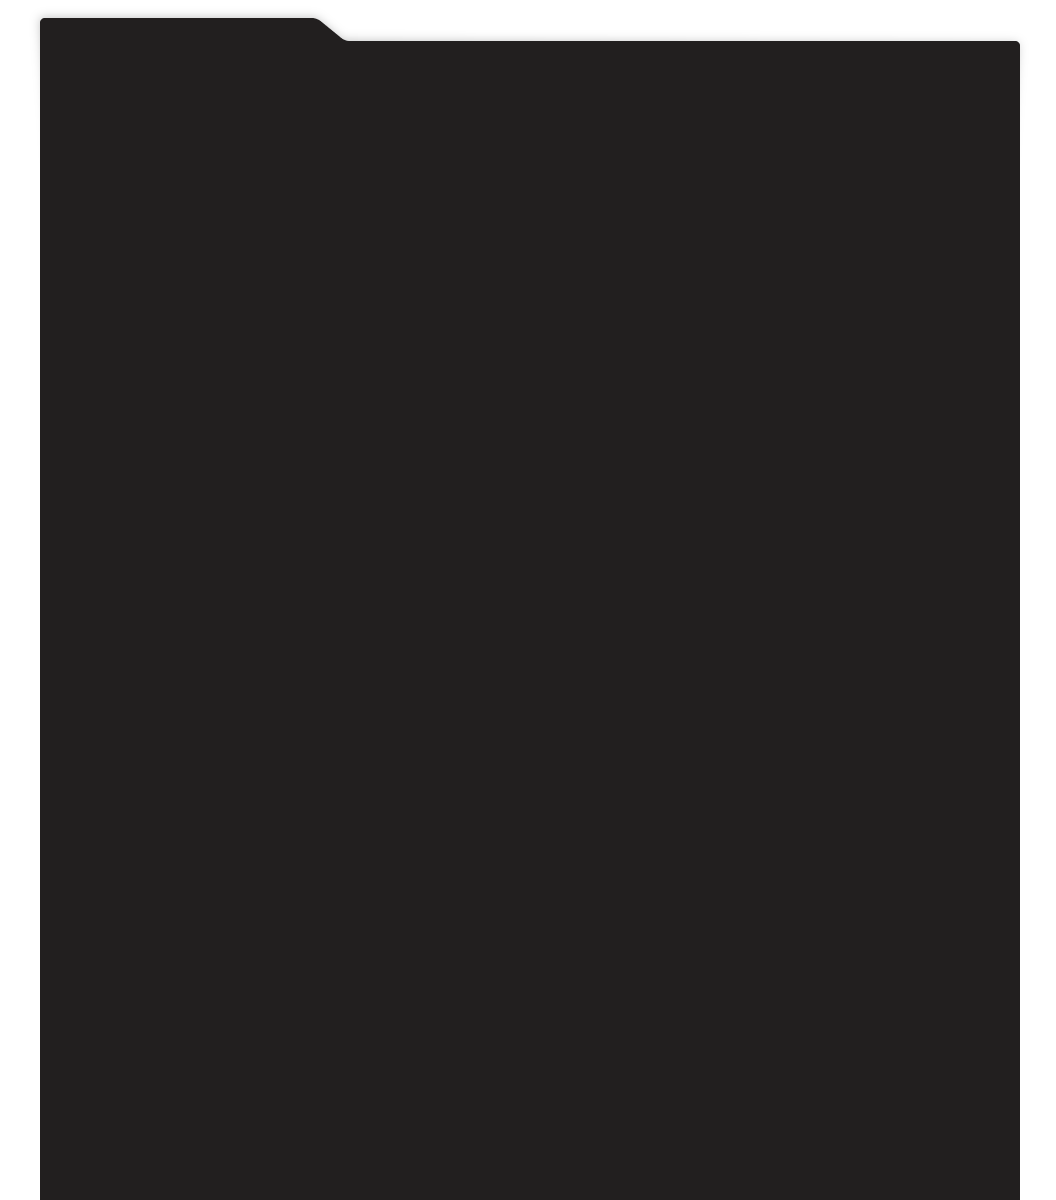
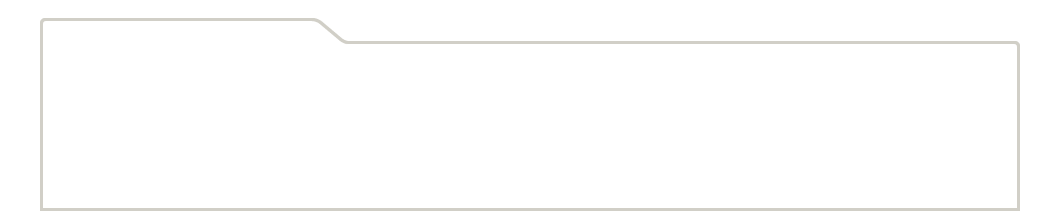
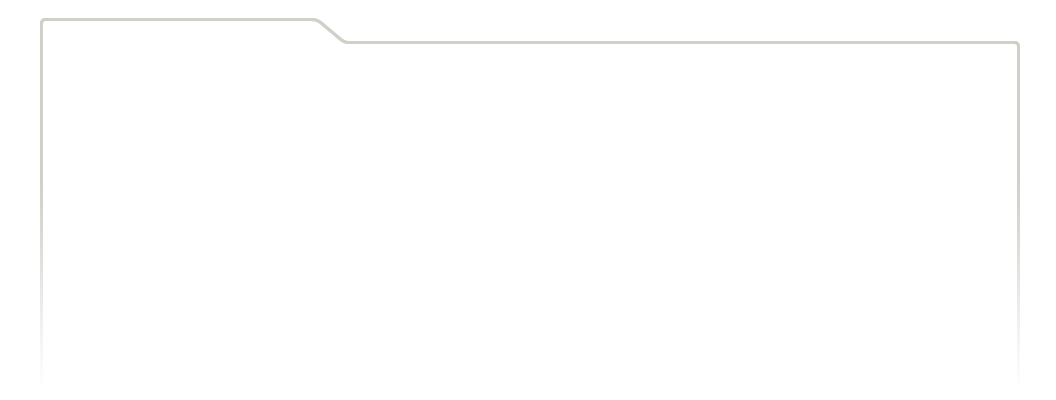
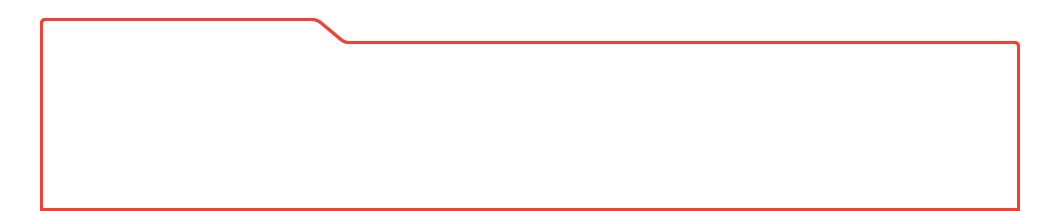
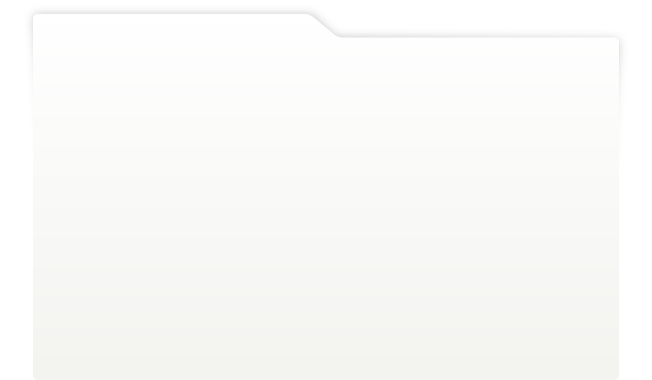
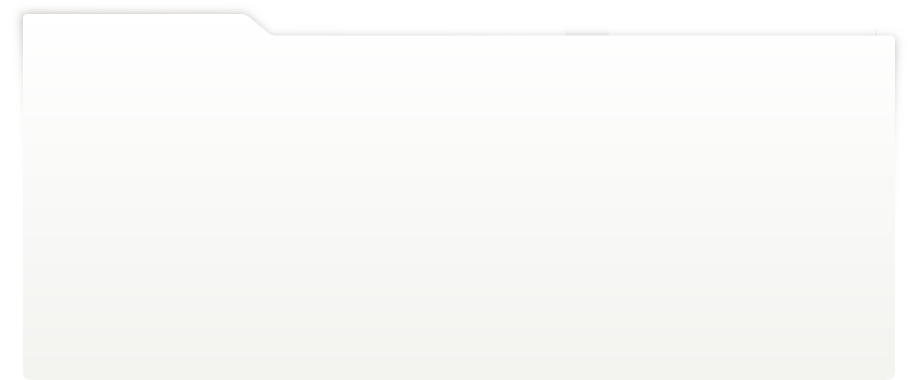
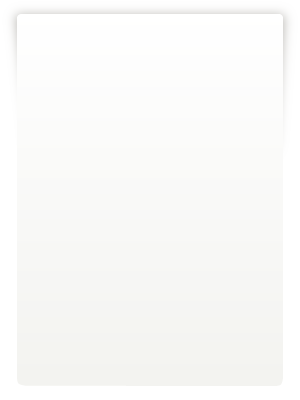
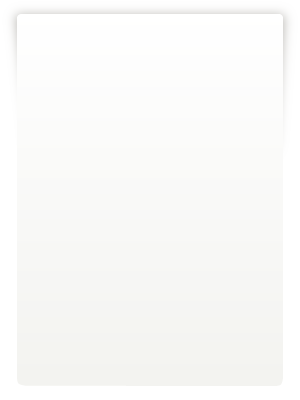
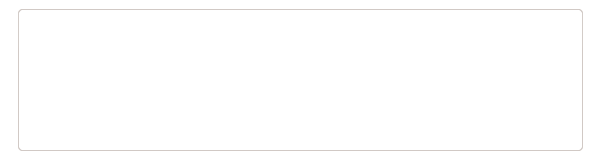
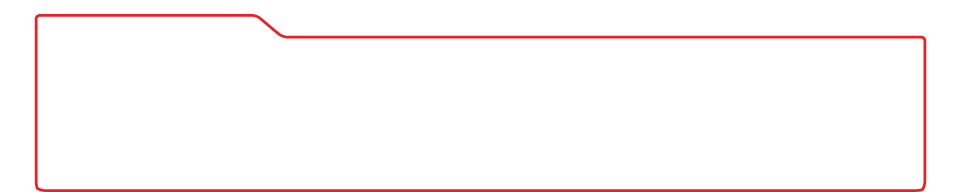
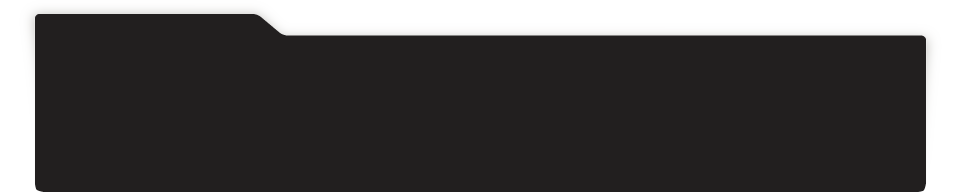
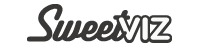
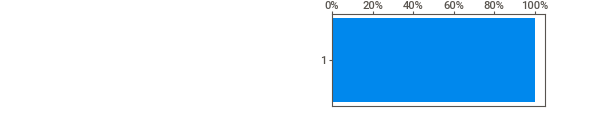
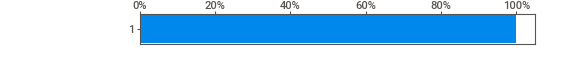
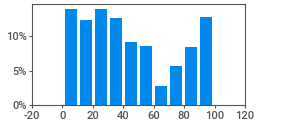
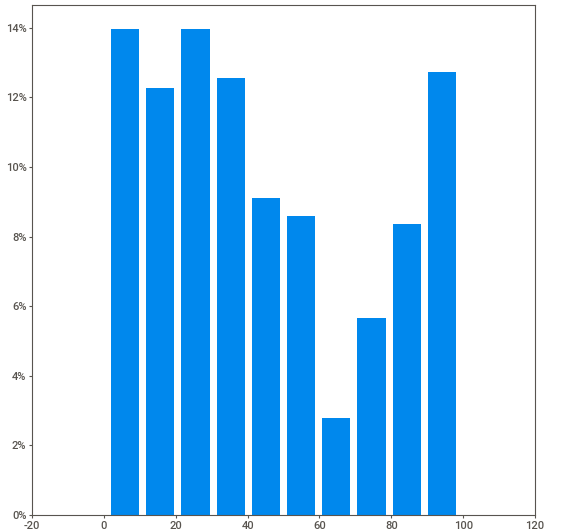
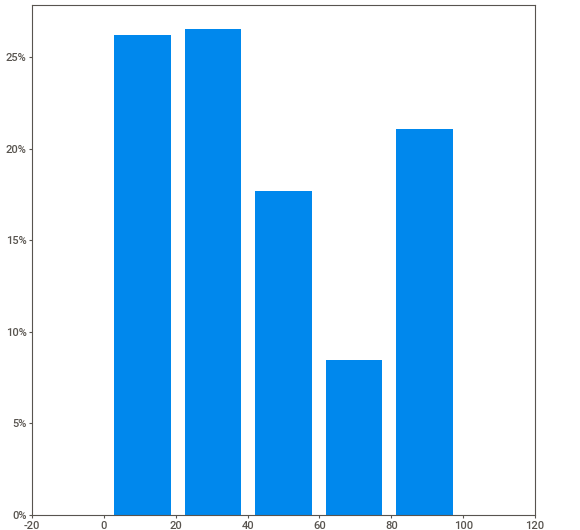
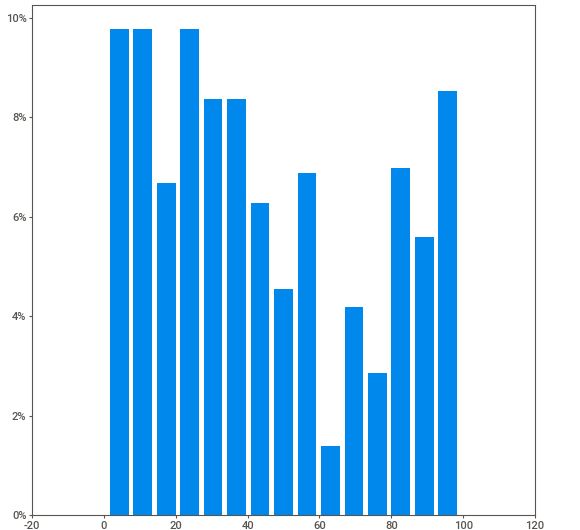
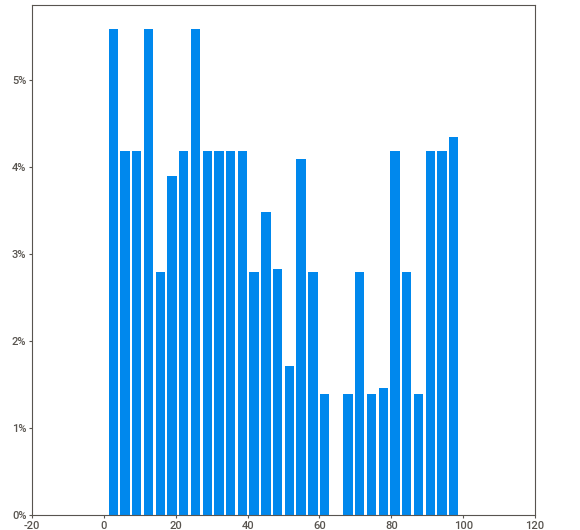
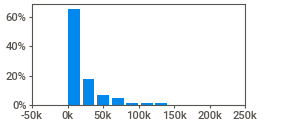
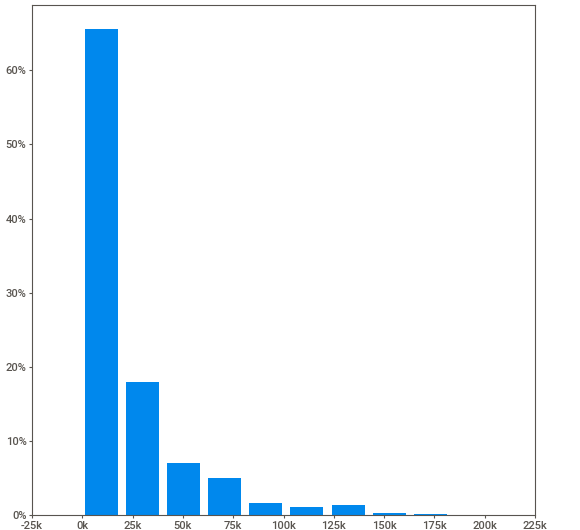
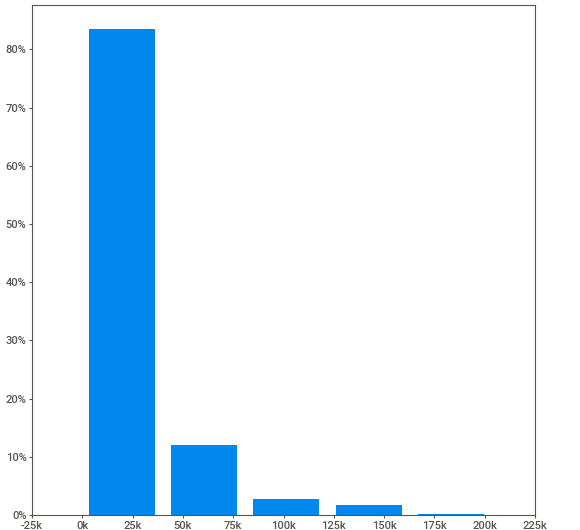
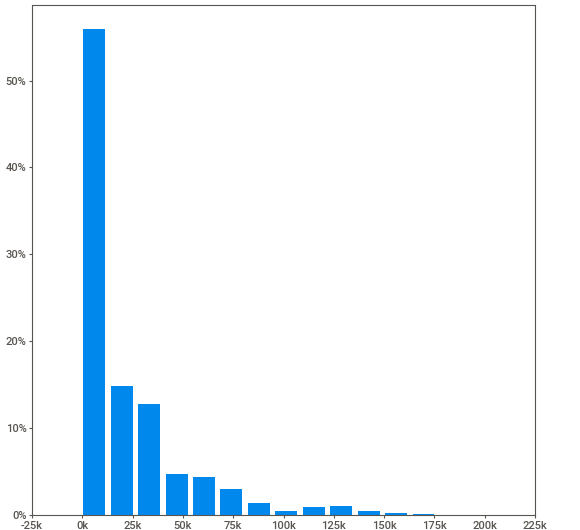
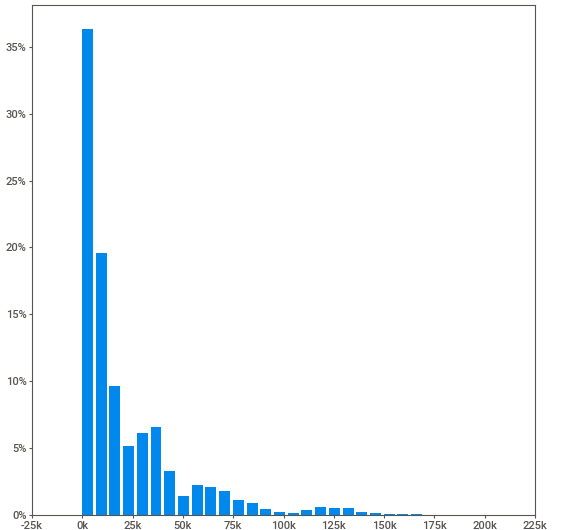
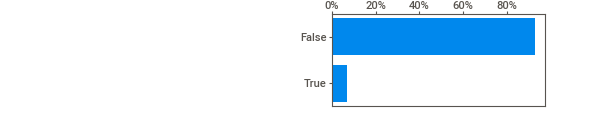
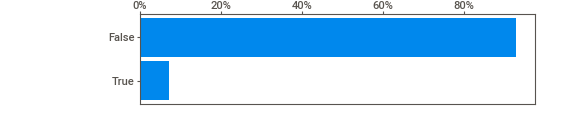
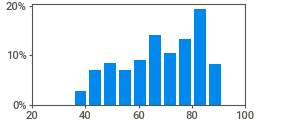
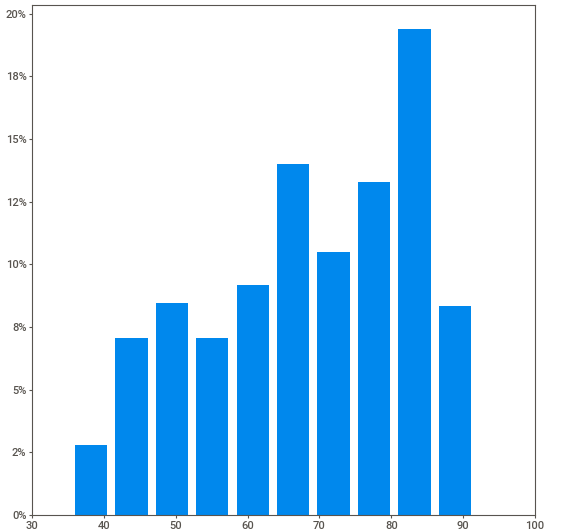
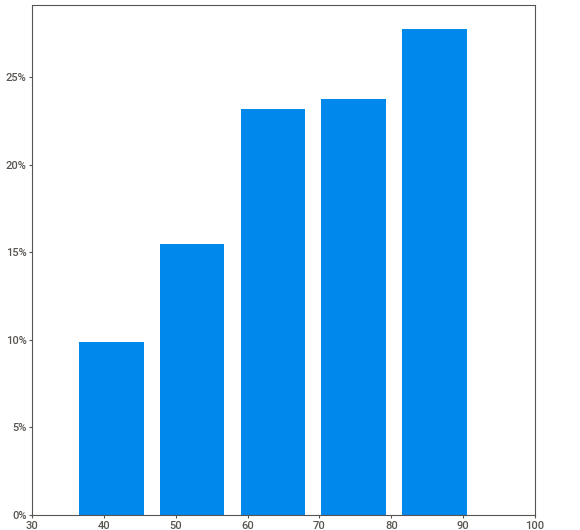
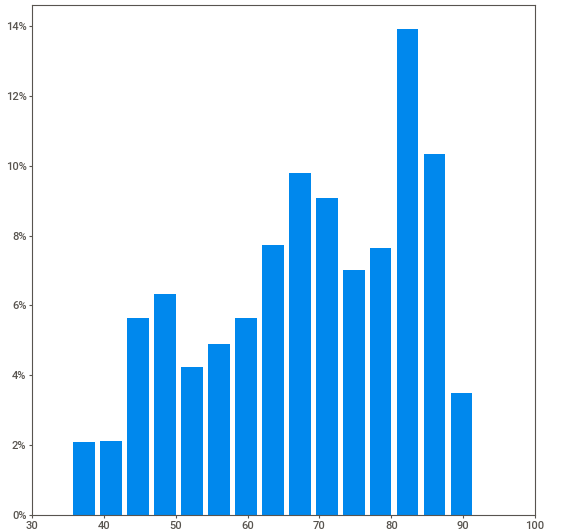
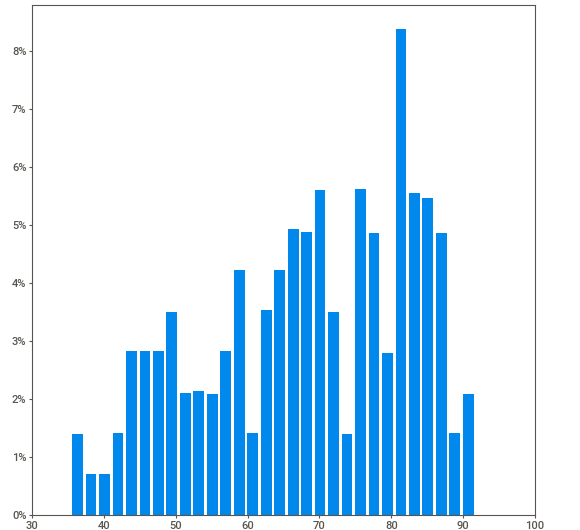
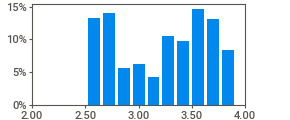
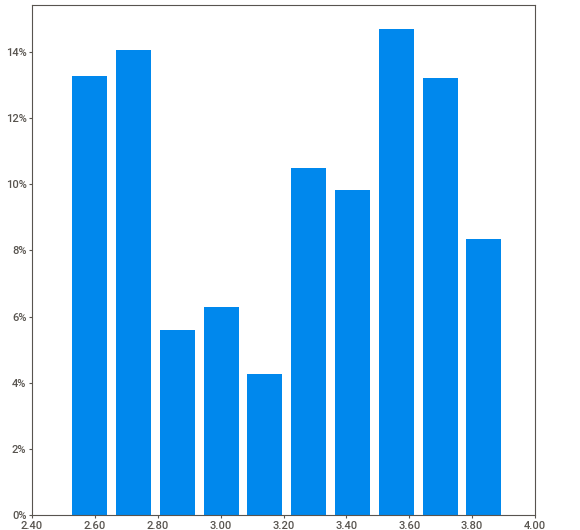
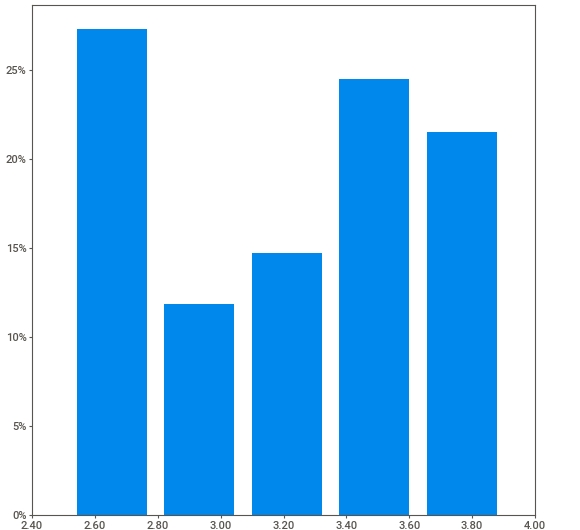
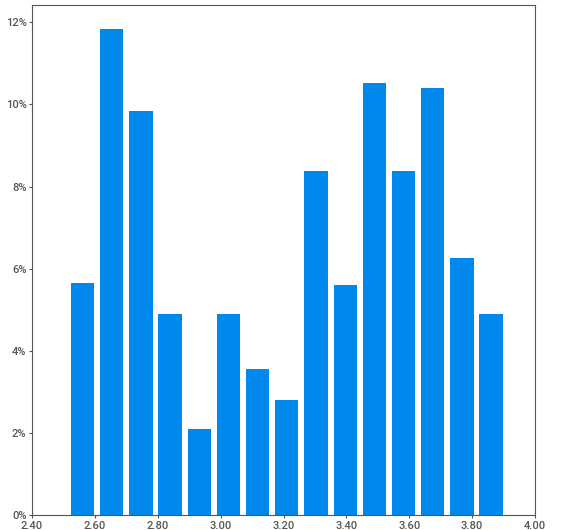
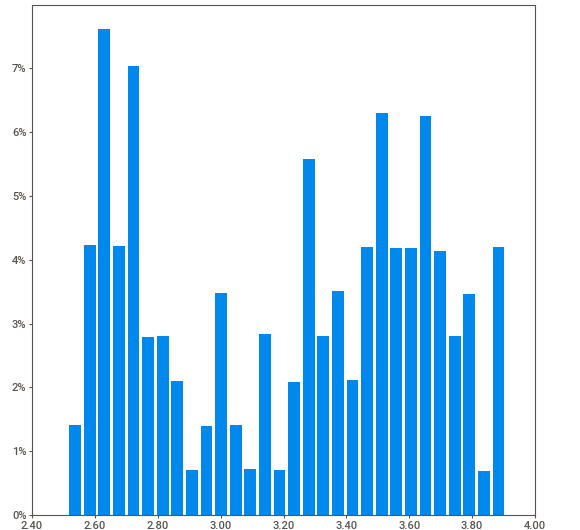
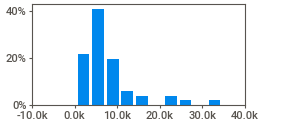
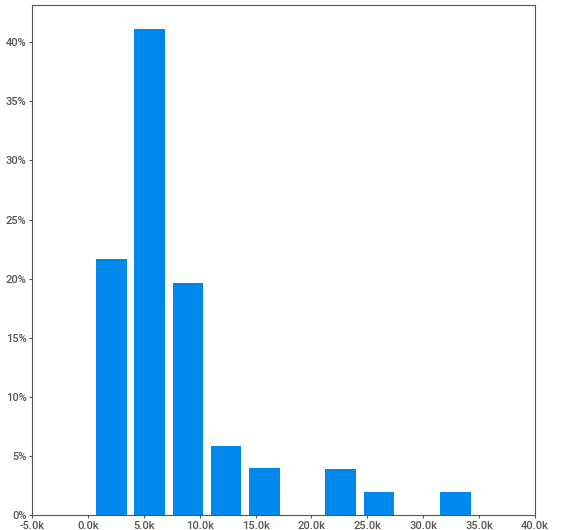
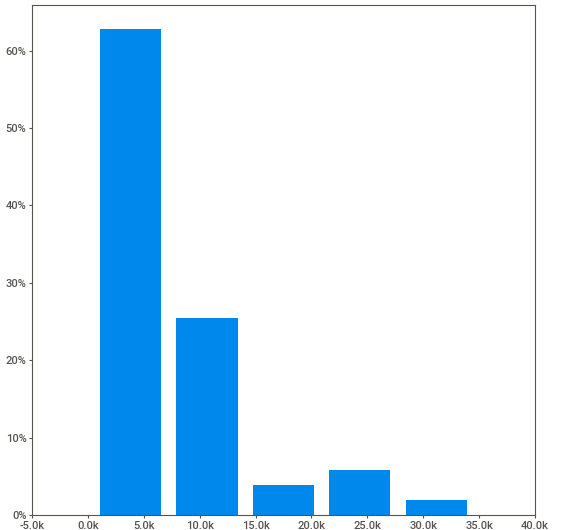
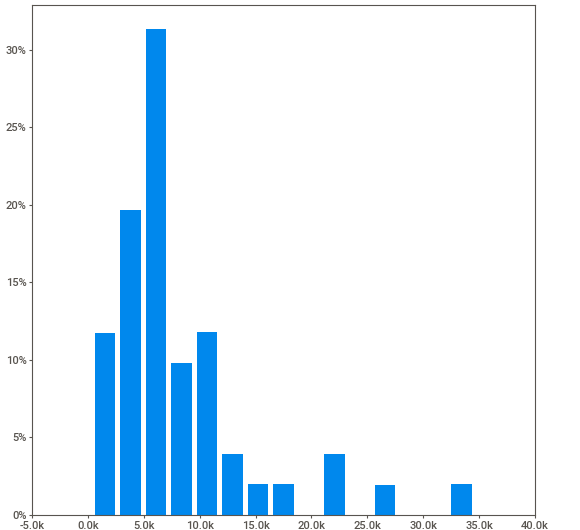
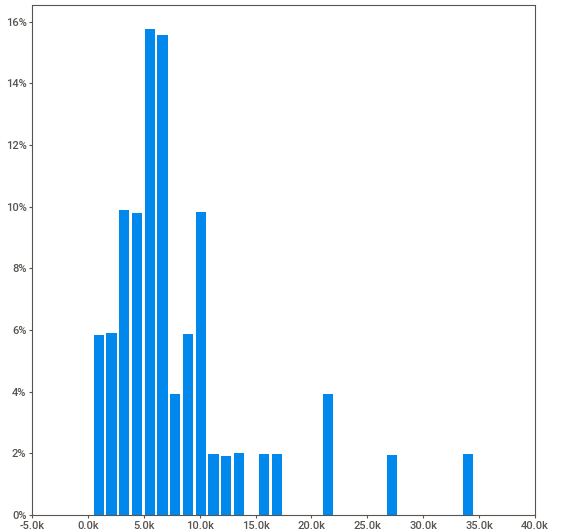
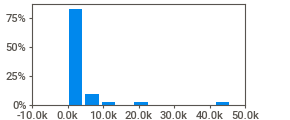
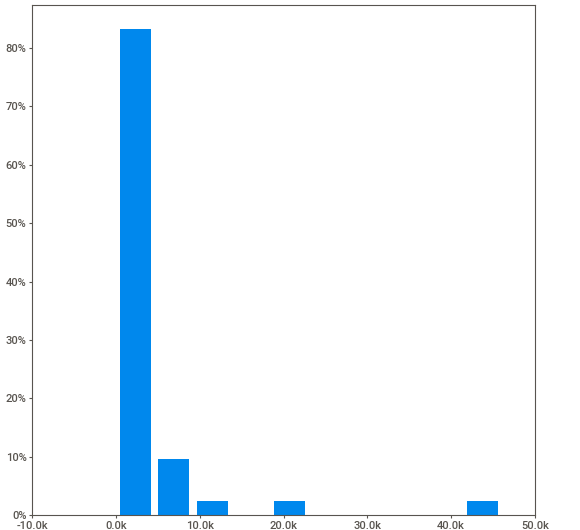
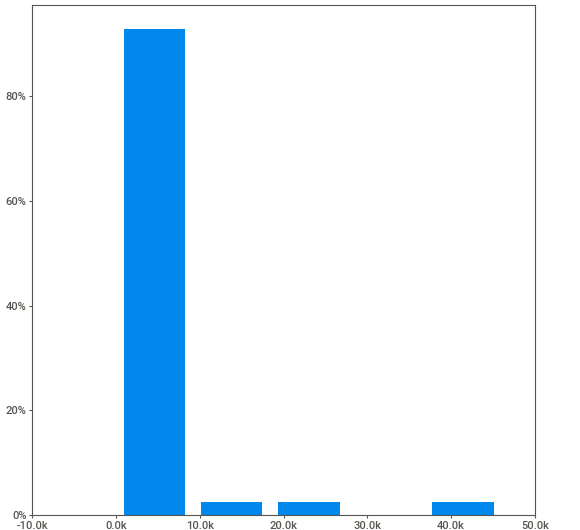
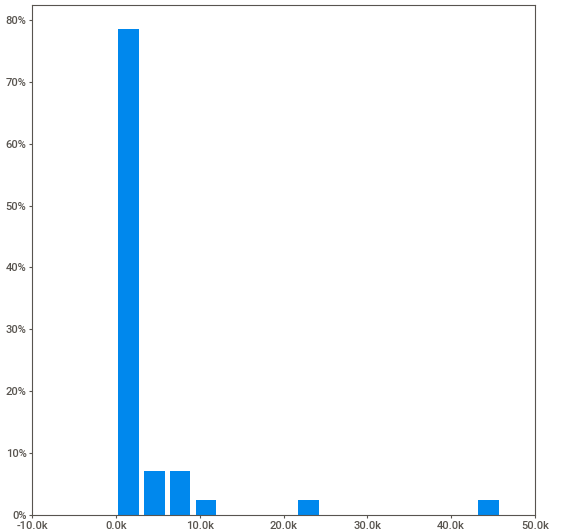
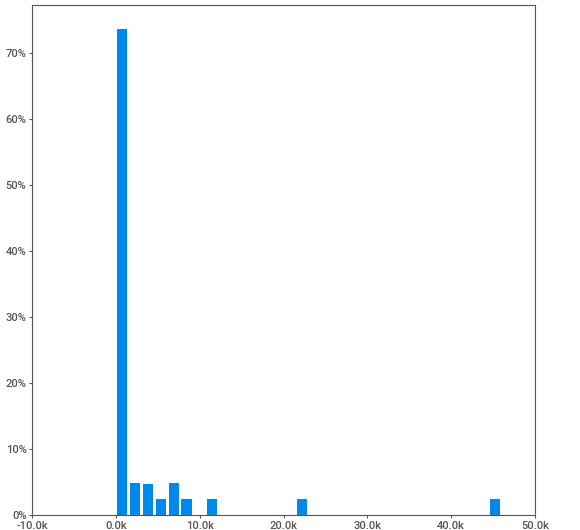
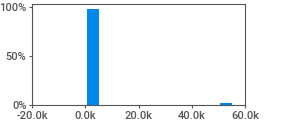
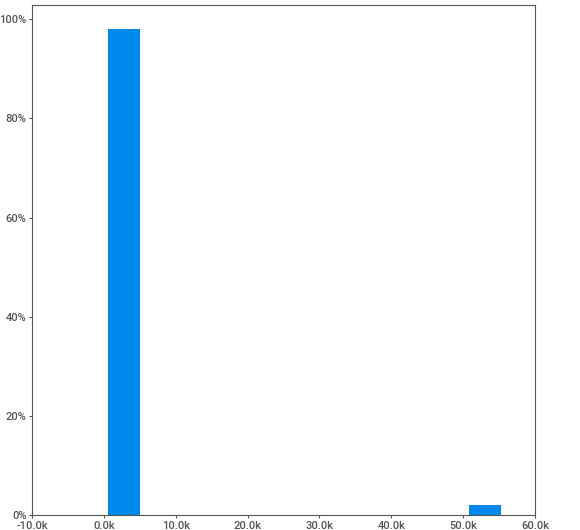
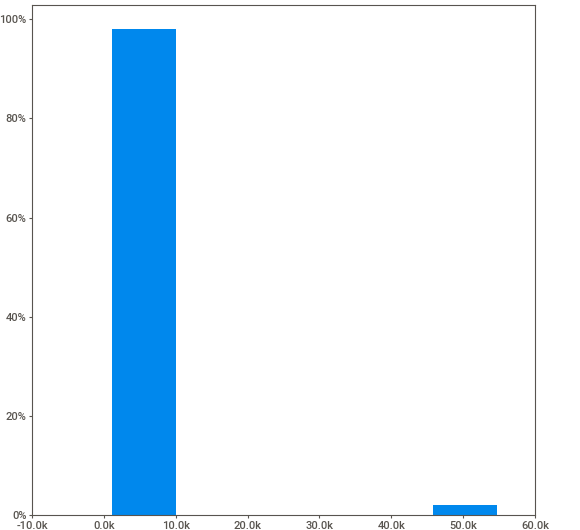
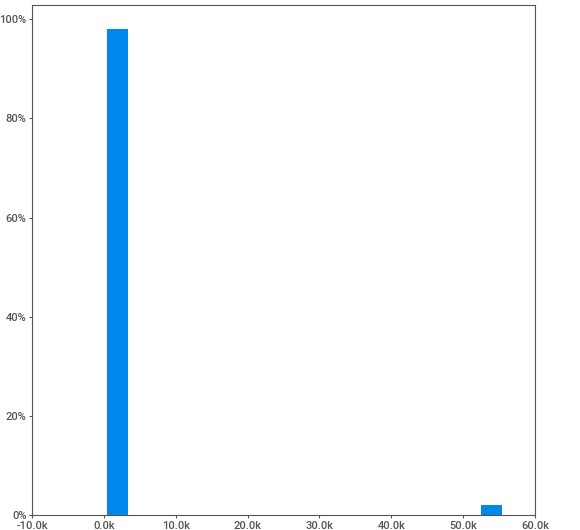
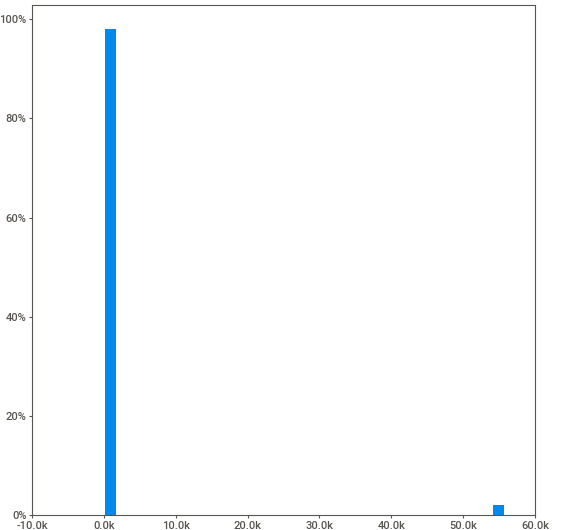
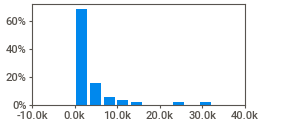
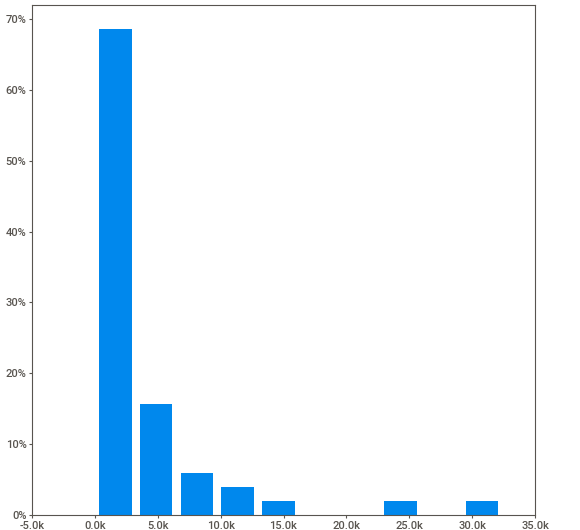
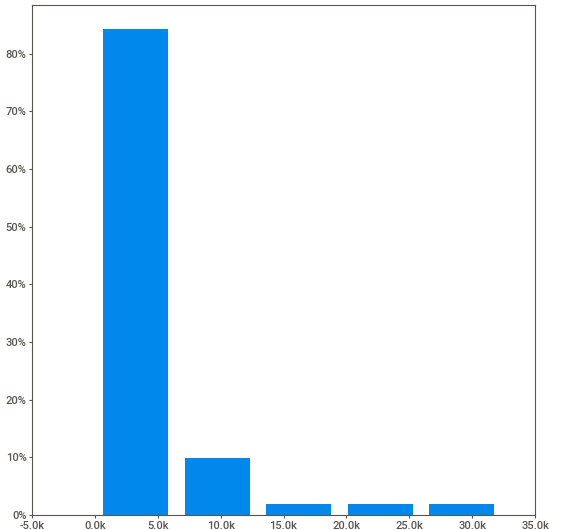
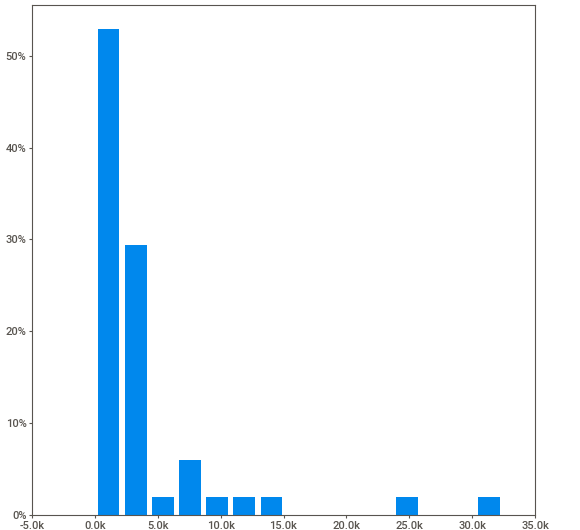
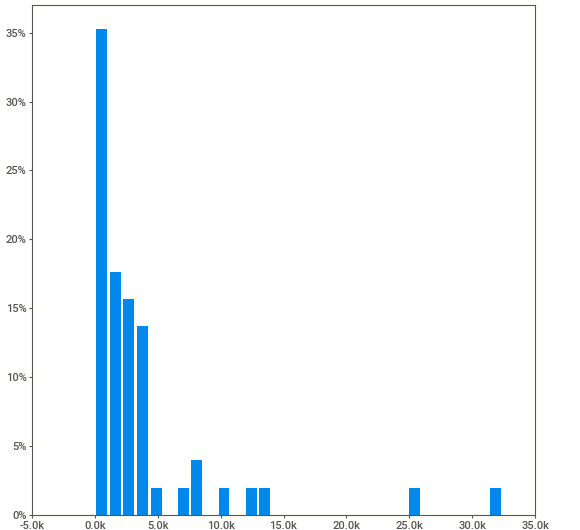
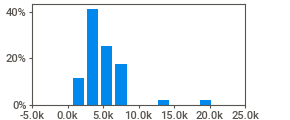
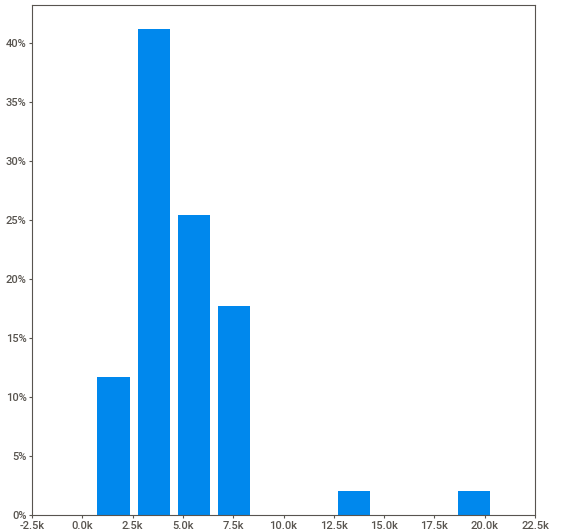
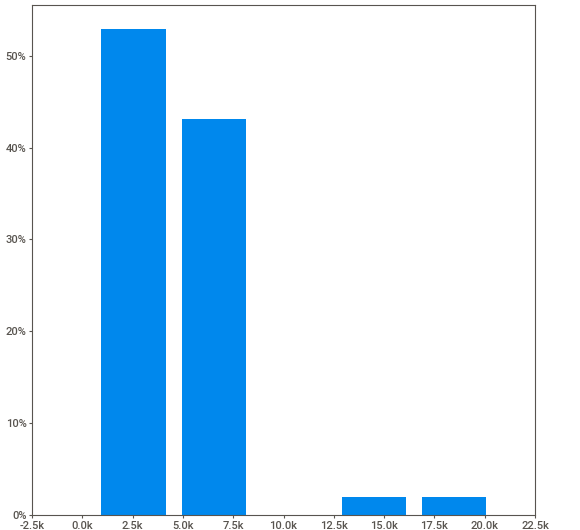
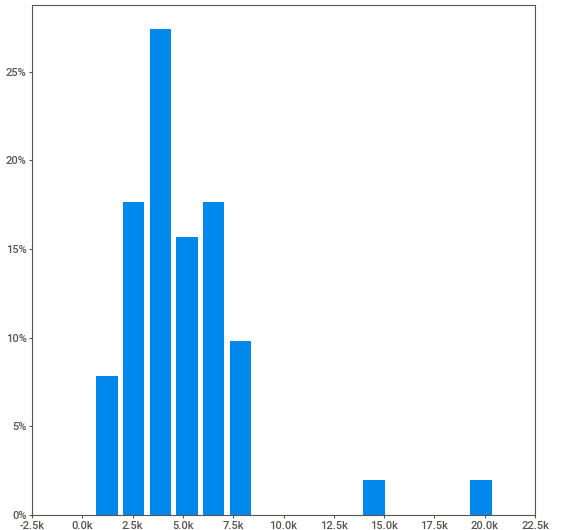
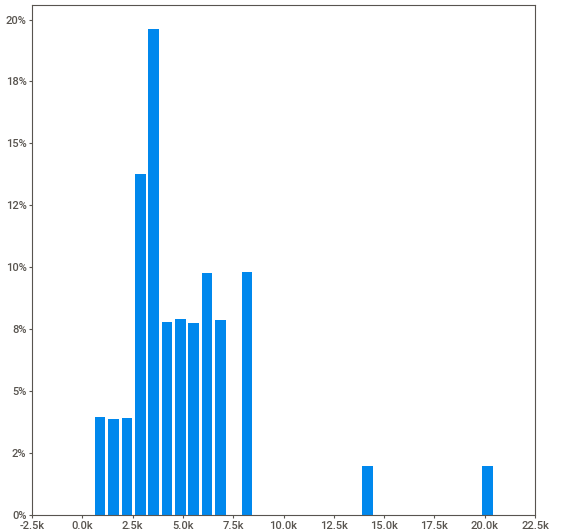
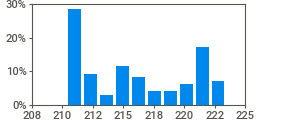
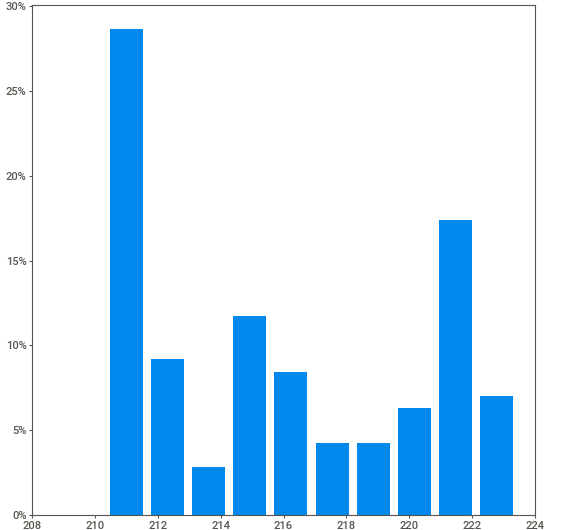
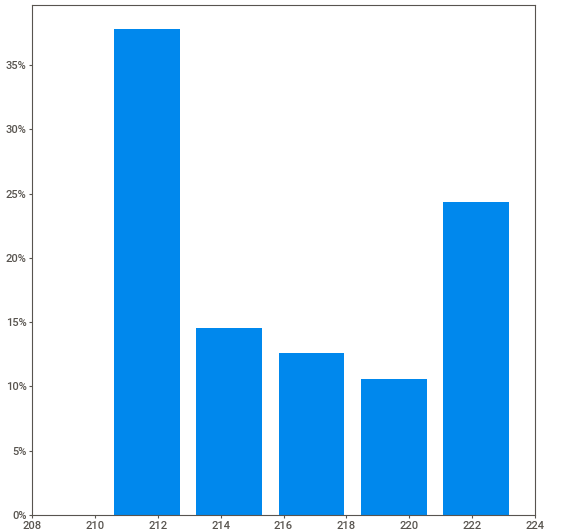
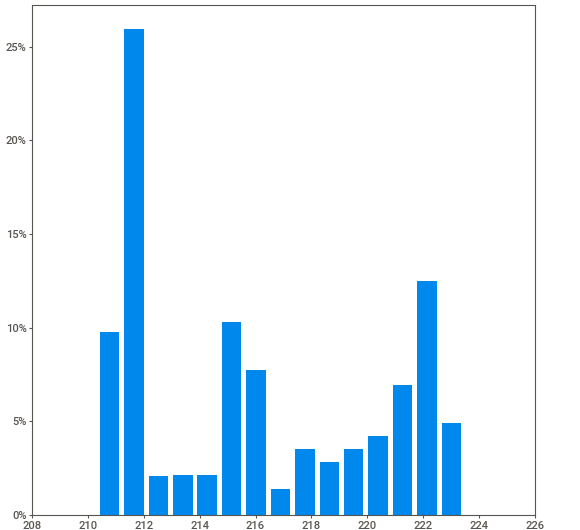
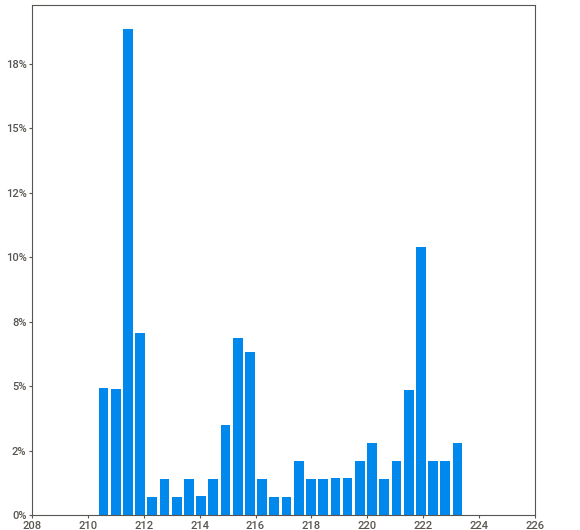
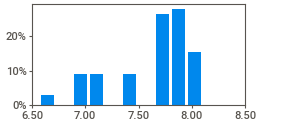
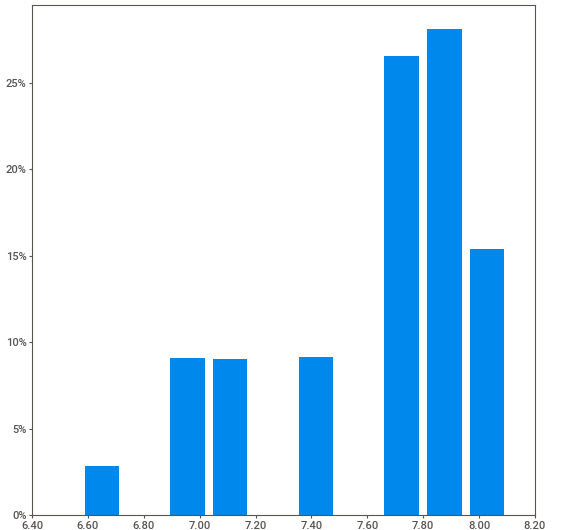
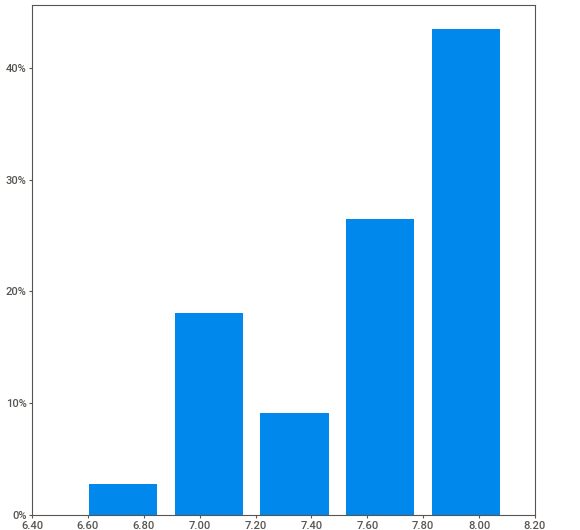
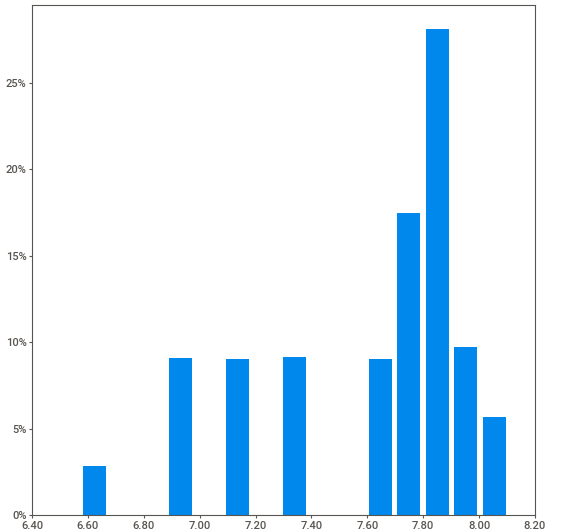
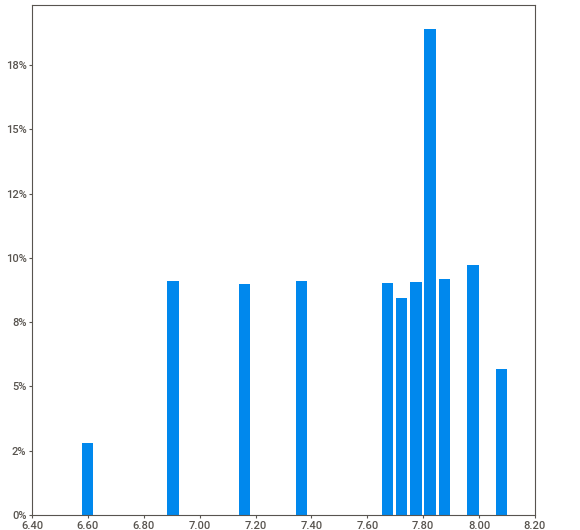
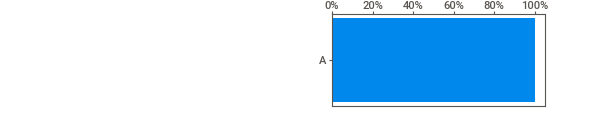
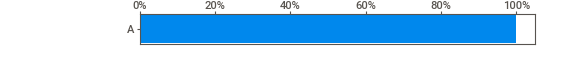
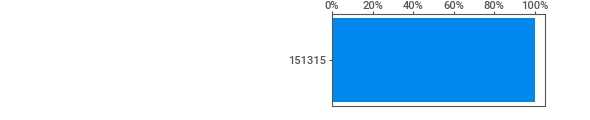
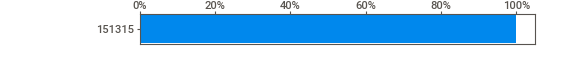
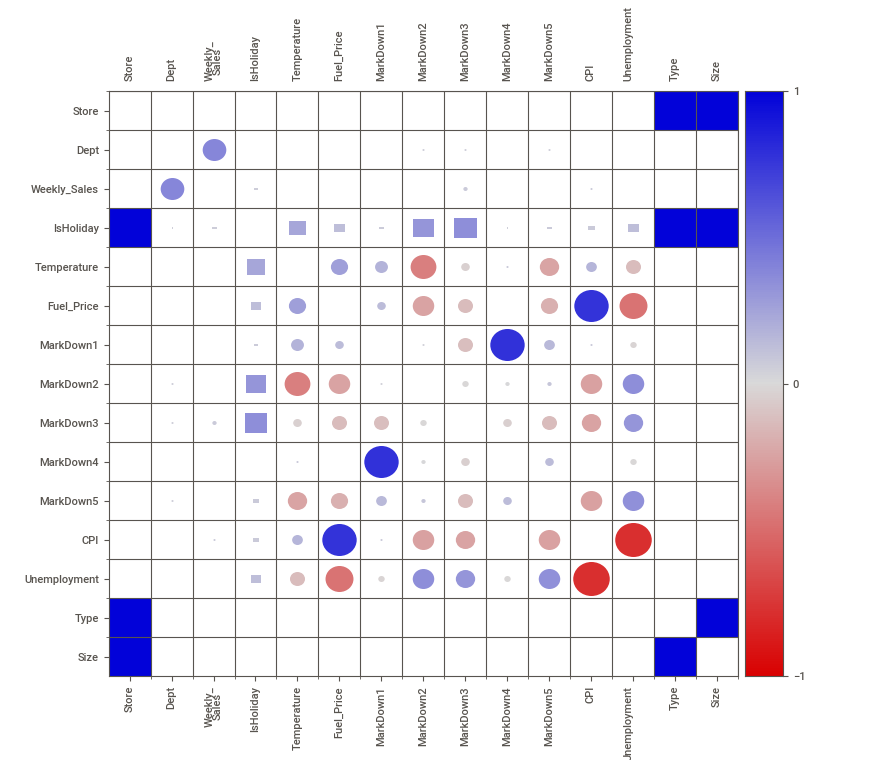
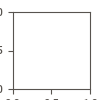

In [79]:
import sweetviz as sv

orig_data_report = sv.analyze(df)
orig_data_report.show_notebook()

1. Click on a feature to tab to explore the feature in more detail.
2. Notice that `SweetViz` calculates the descriptive stats for each feature, along with its missing and duplicate value stats.
3. Notice that `SweetViz` helps to detect numerical vs categorical datatypes.
4. Click on the `ASSOCIATIONS` tab to explore associations/correlations!

### Prefer a browser experience?

In [80]:
orig_data_report.show_html('orig_data_report.html', open_browser=True)

Report orig_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Now let's have a look at a comparison report of our train and test datasets!

                                             |          | [  0%]   00:00 -> (? left)


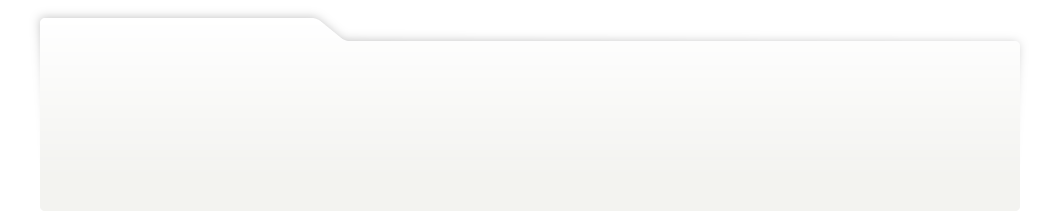
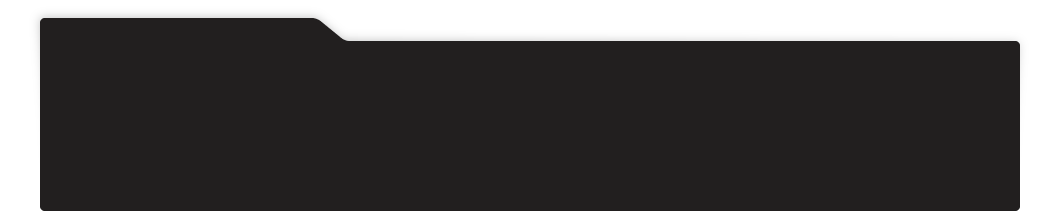
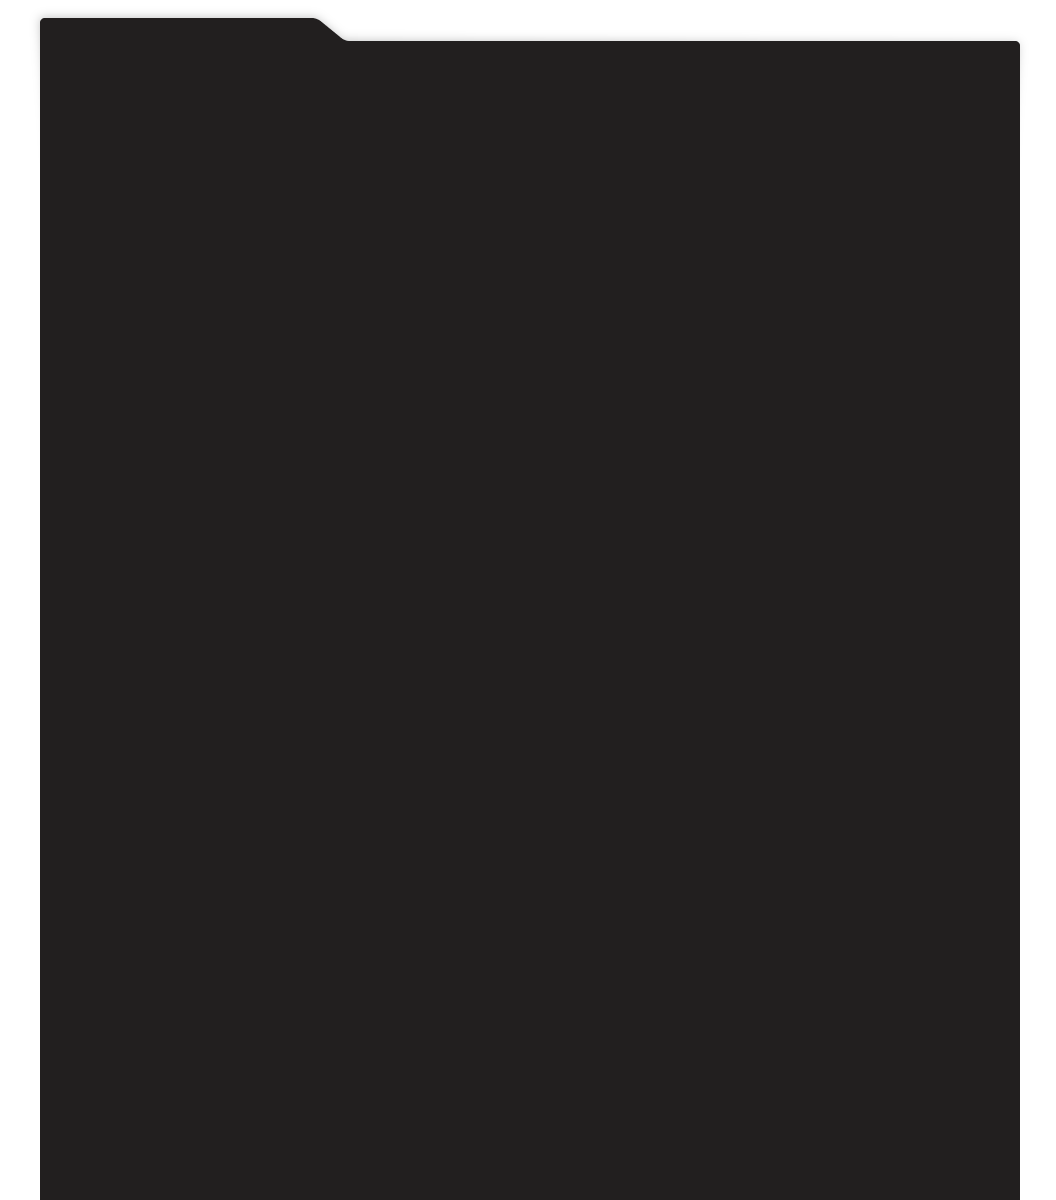
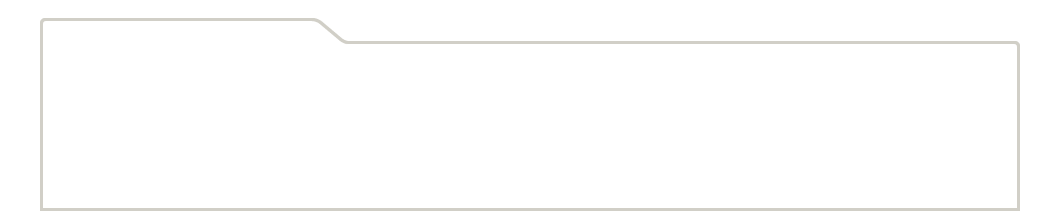
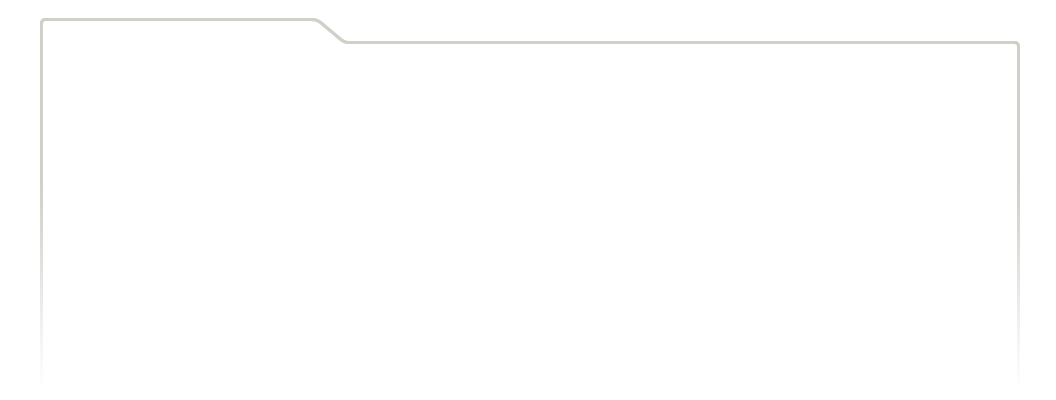
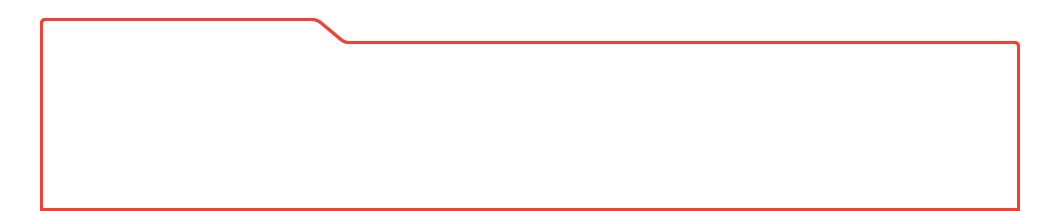
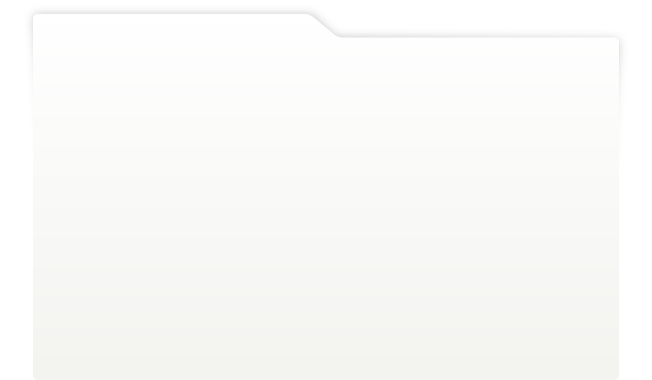
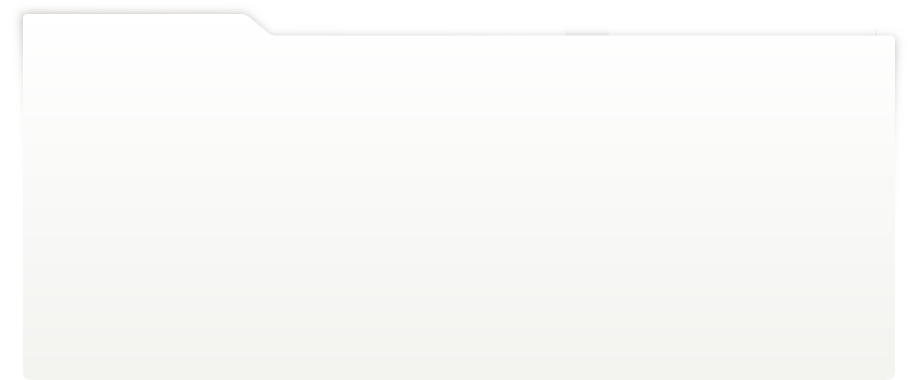
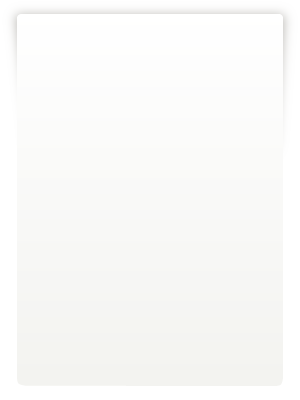
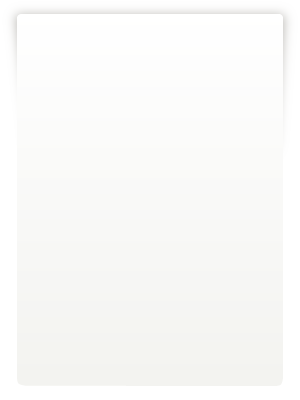
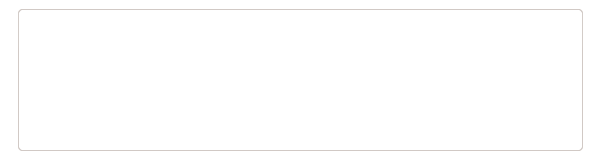
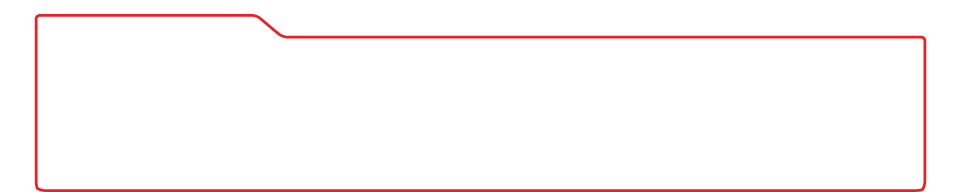
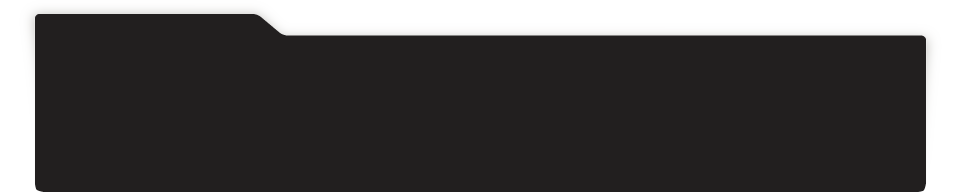
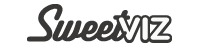
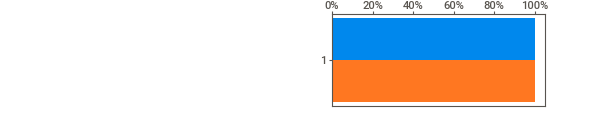
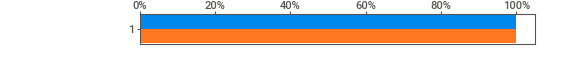
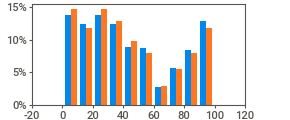
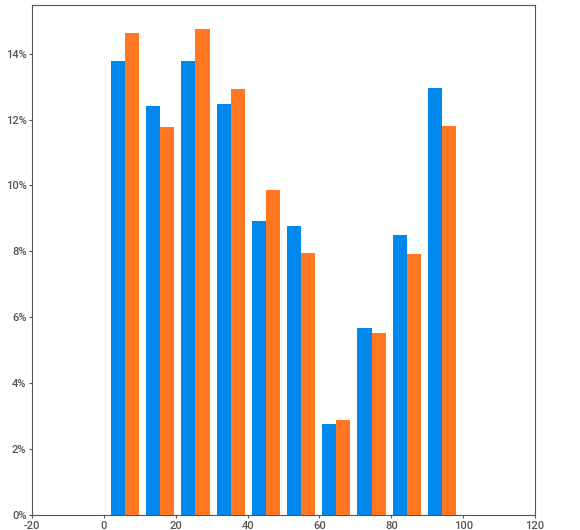
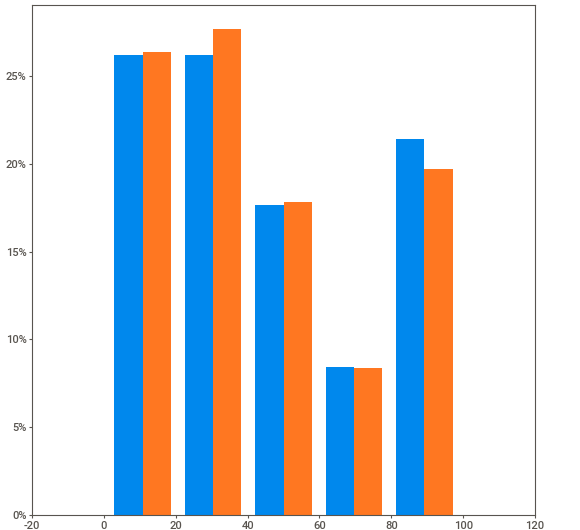
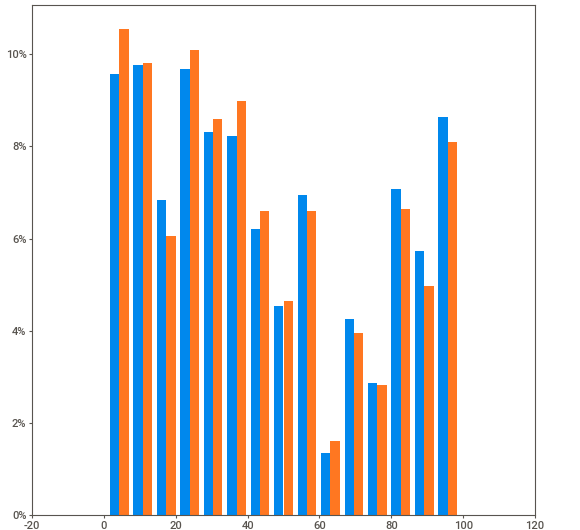
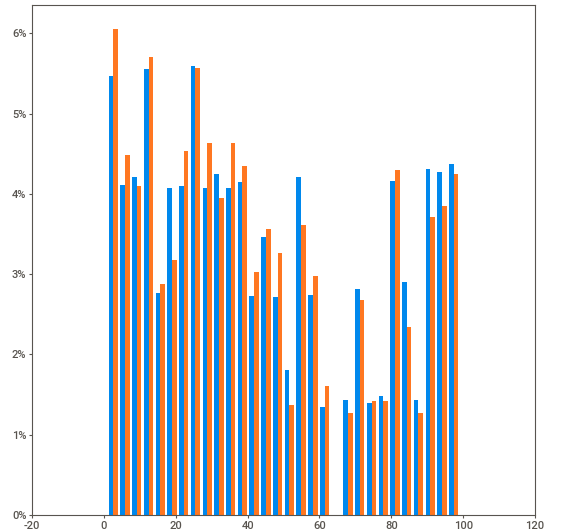
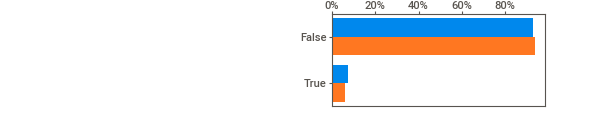
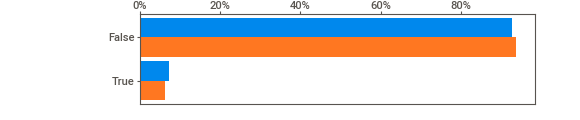
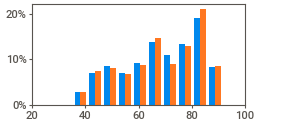
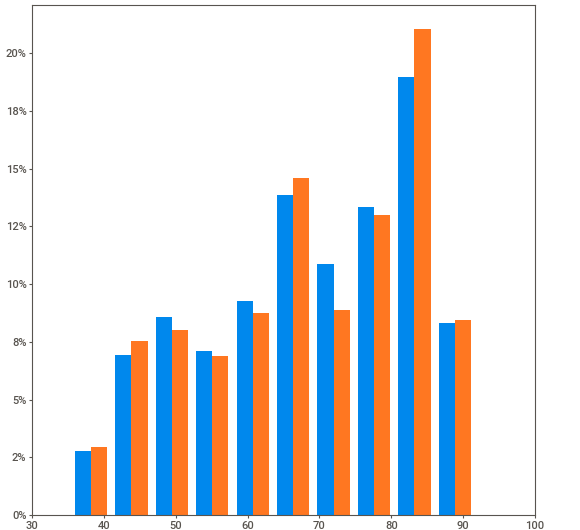
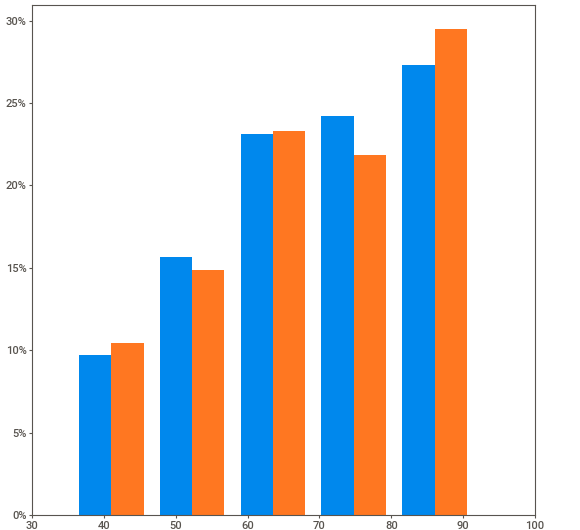
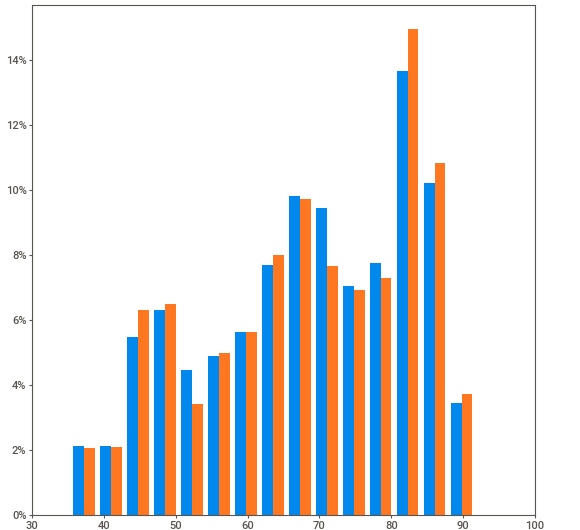
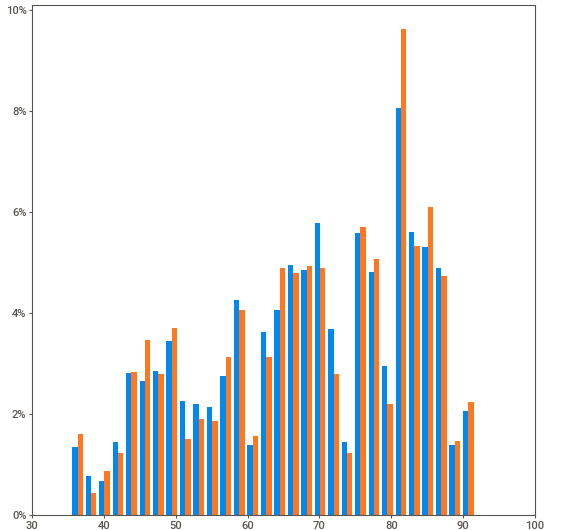
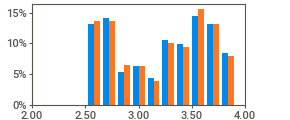
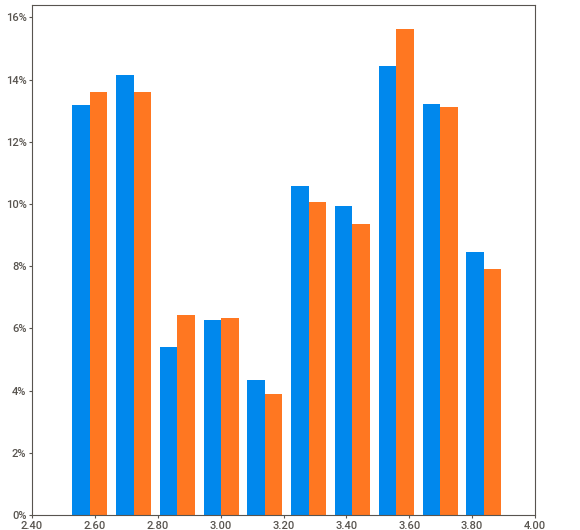
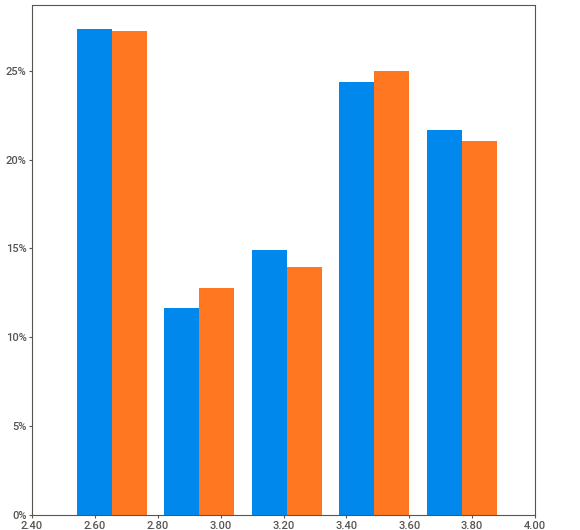
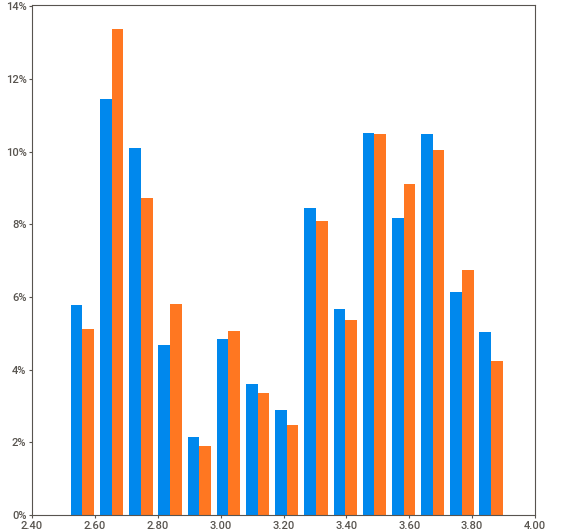
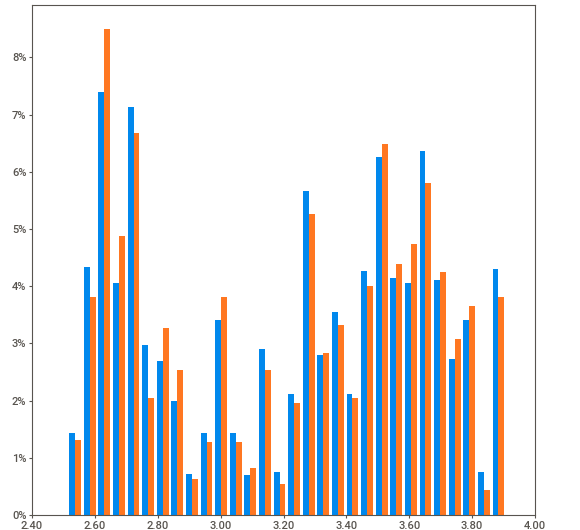
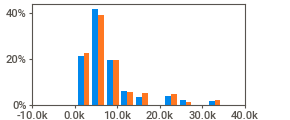
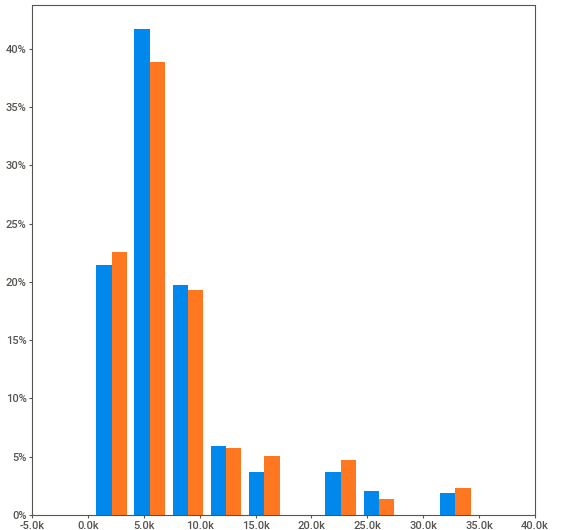
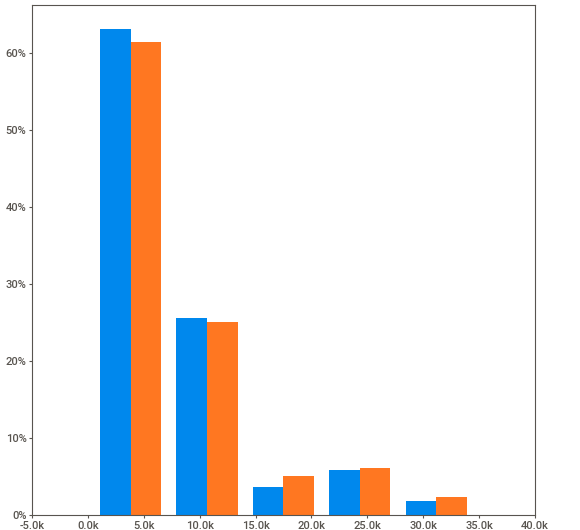
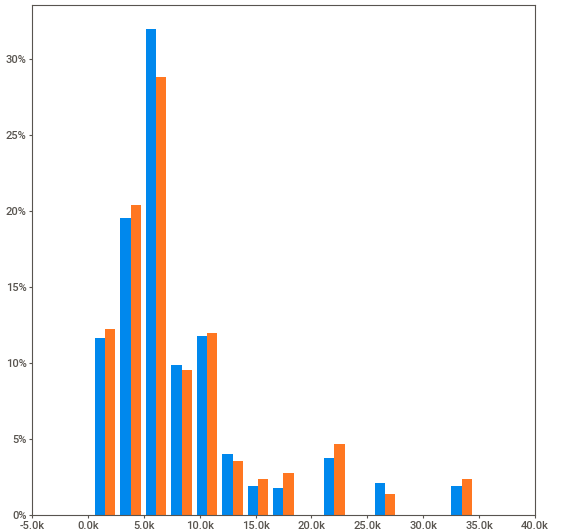
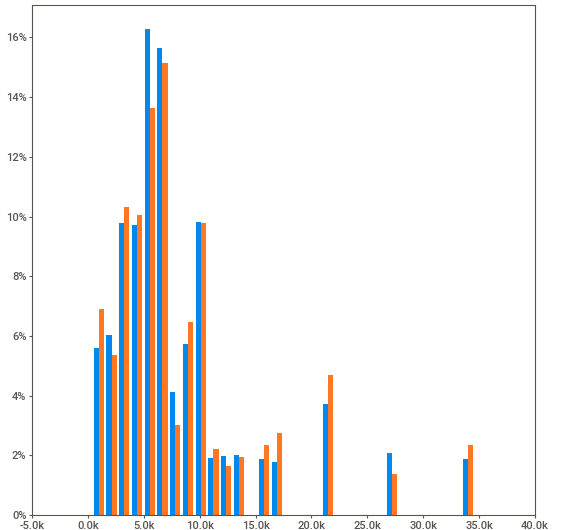
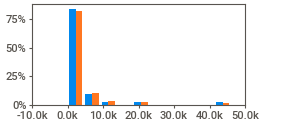
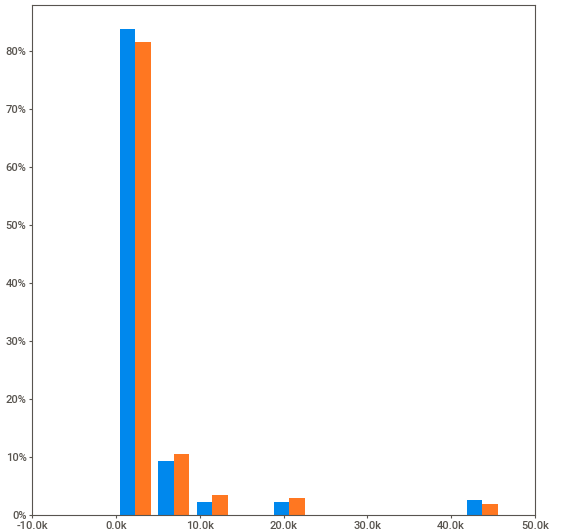
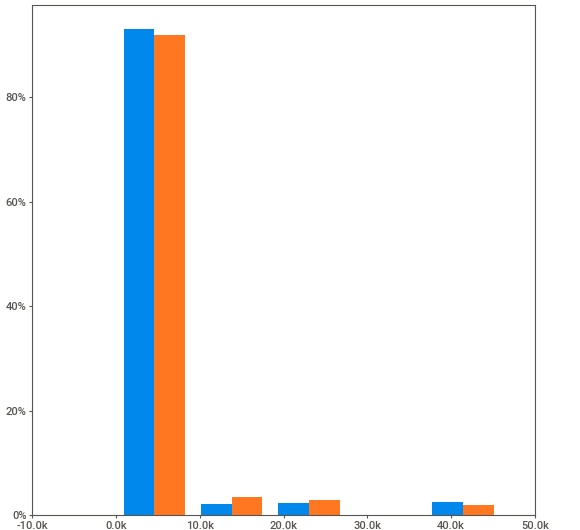
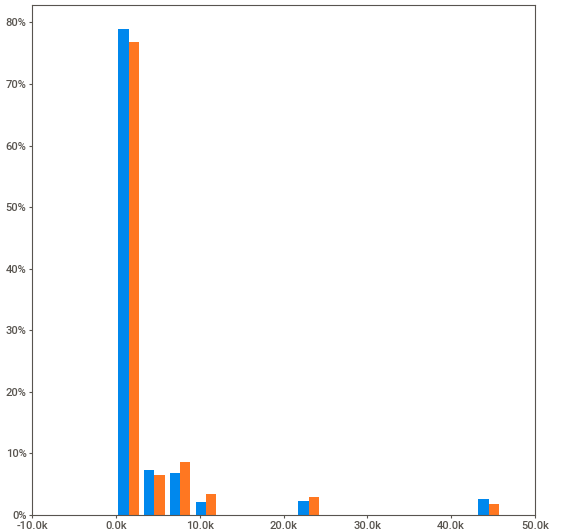
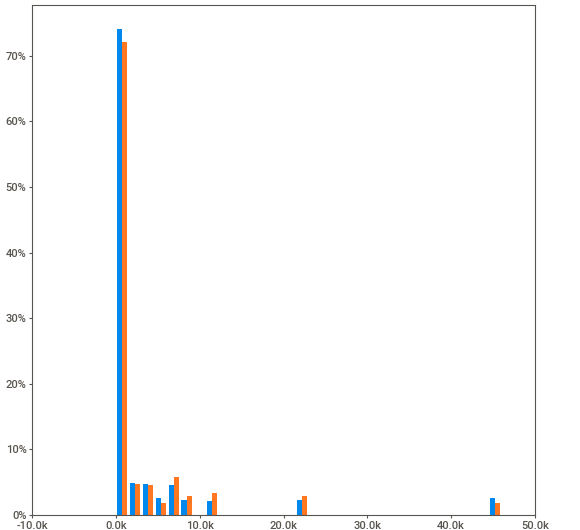
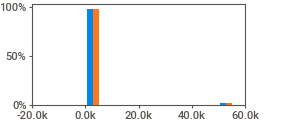
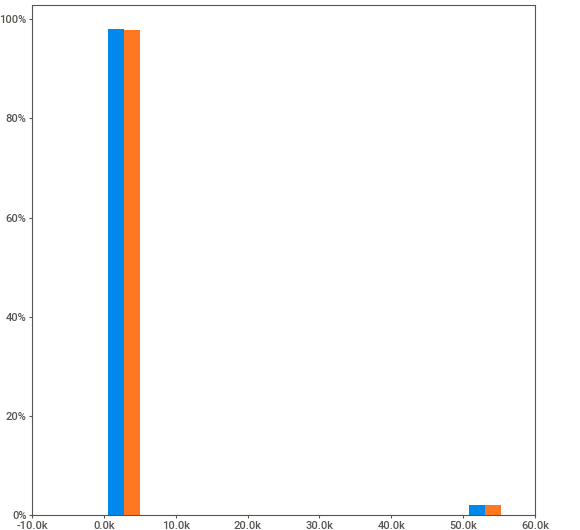
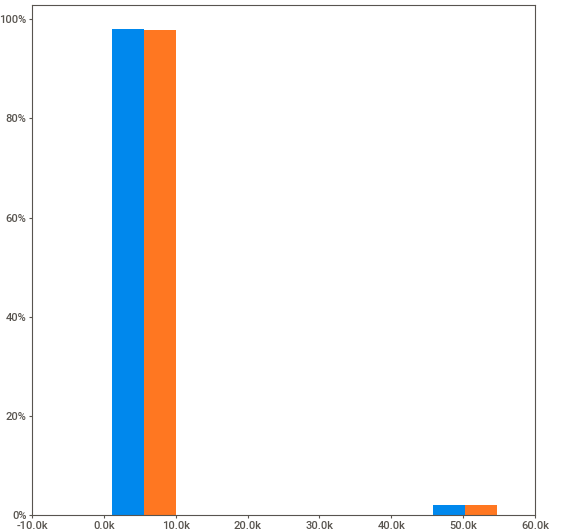
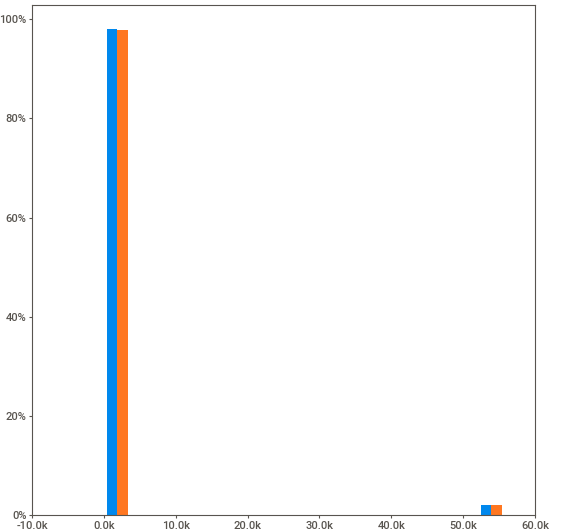
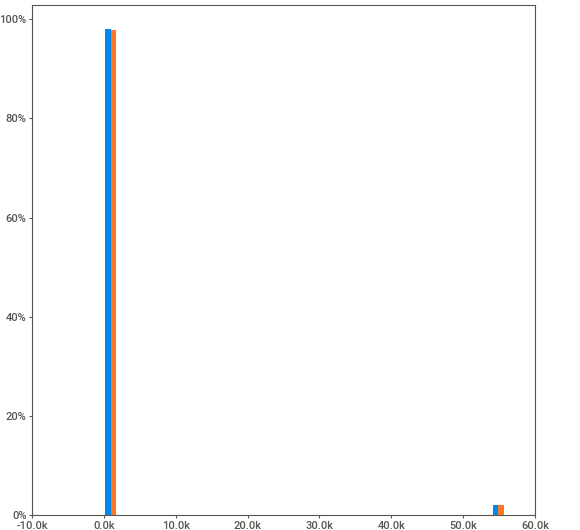
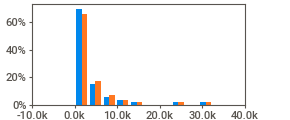
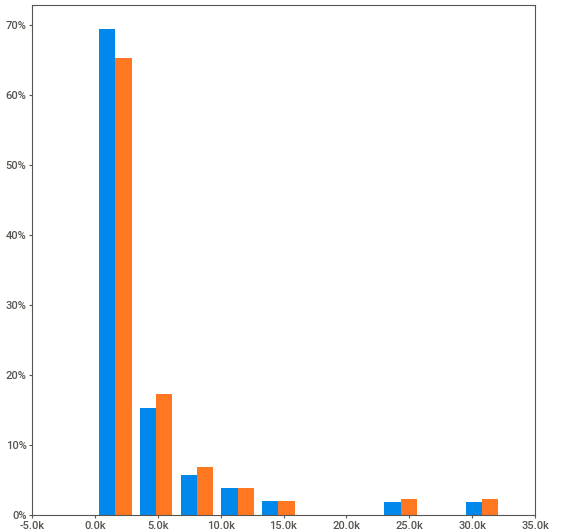
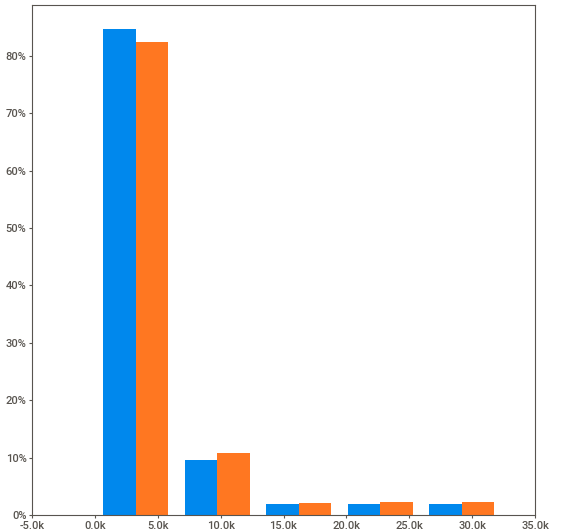
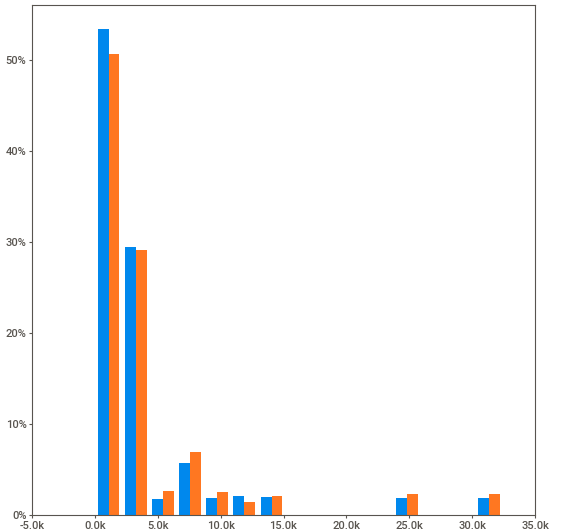
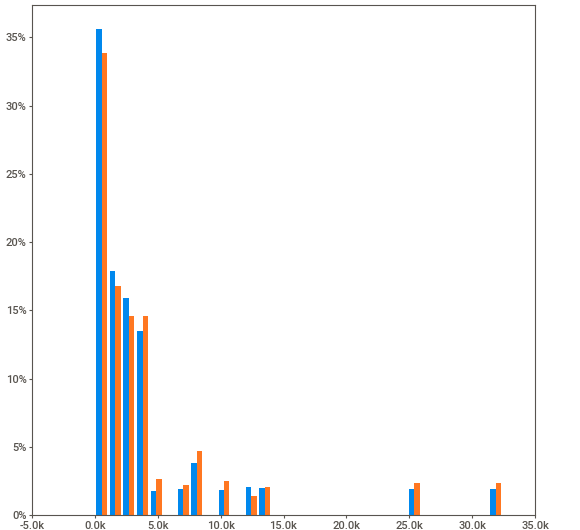
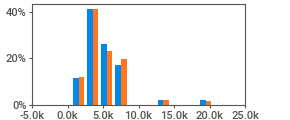
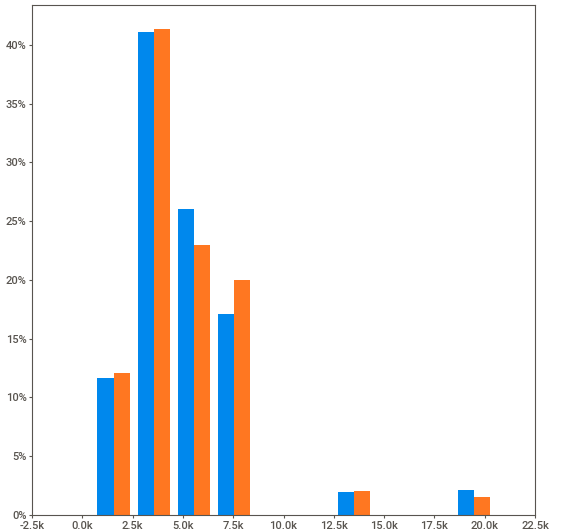
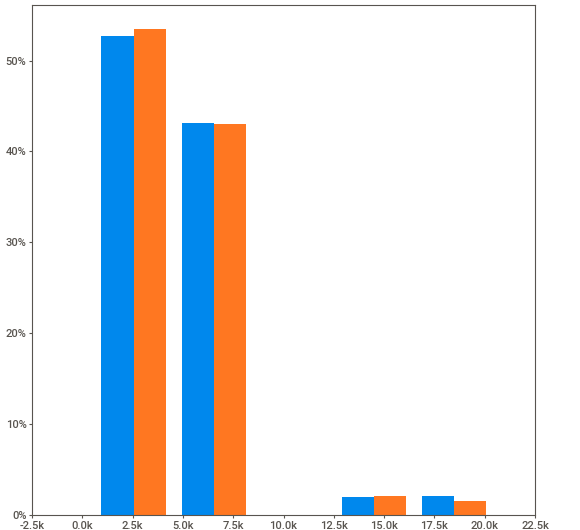
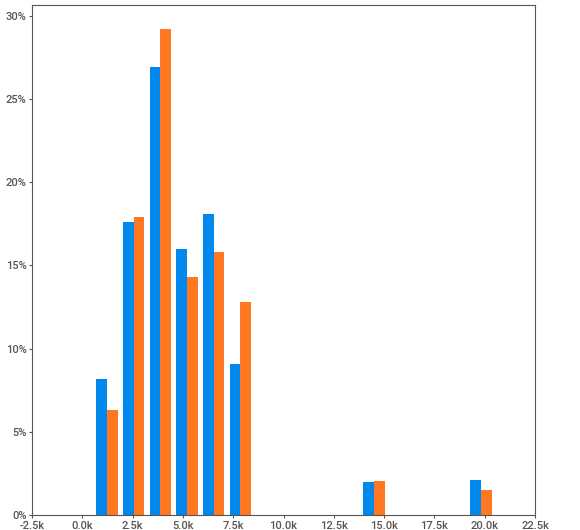
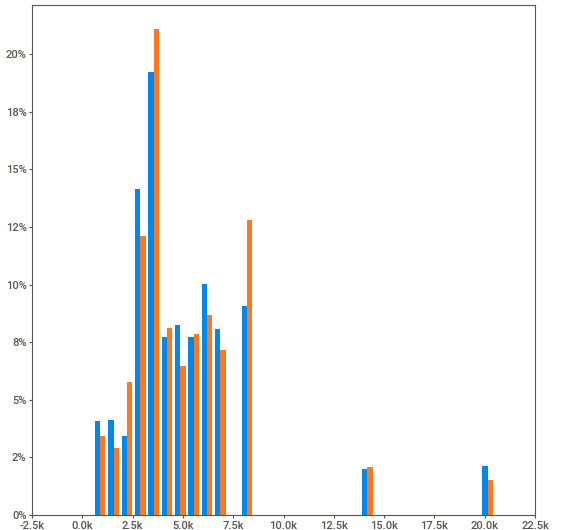
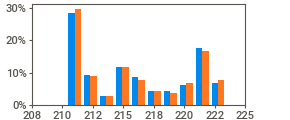
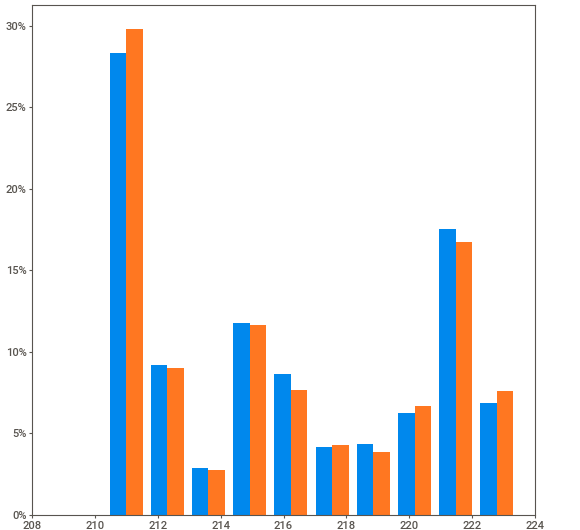
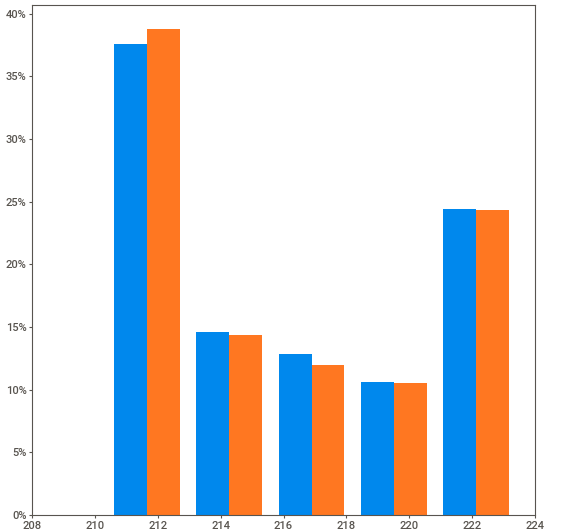
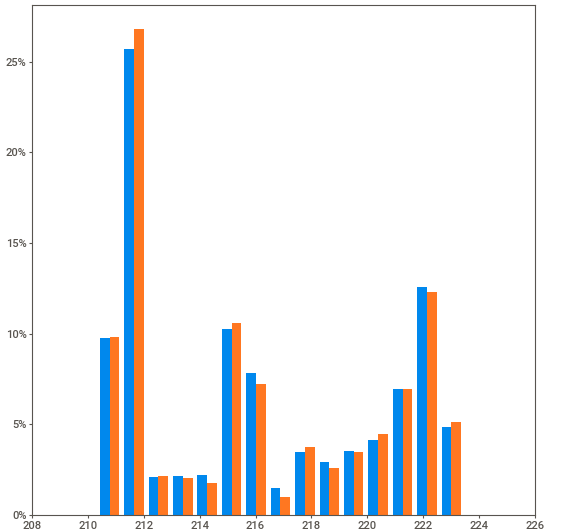
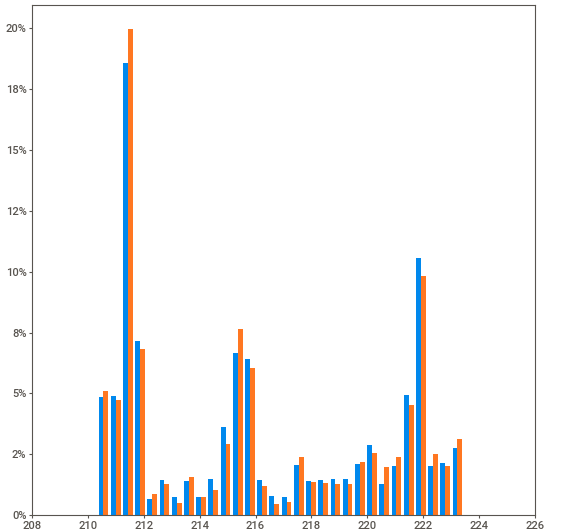
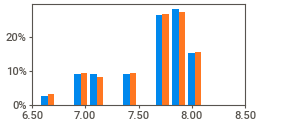
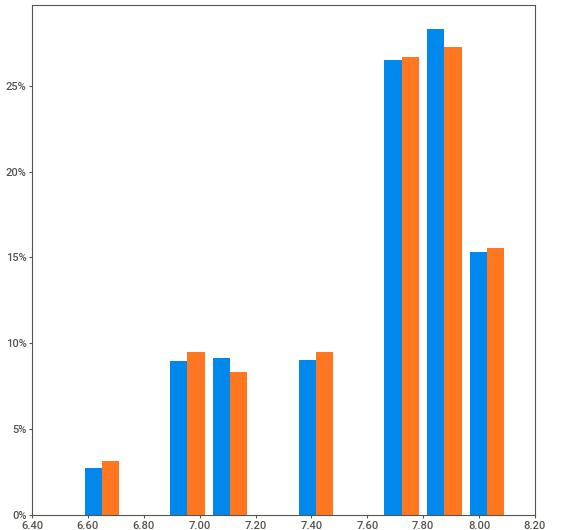
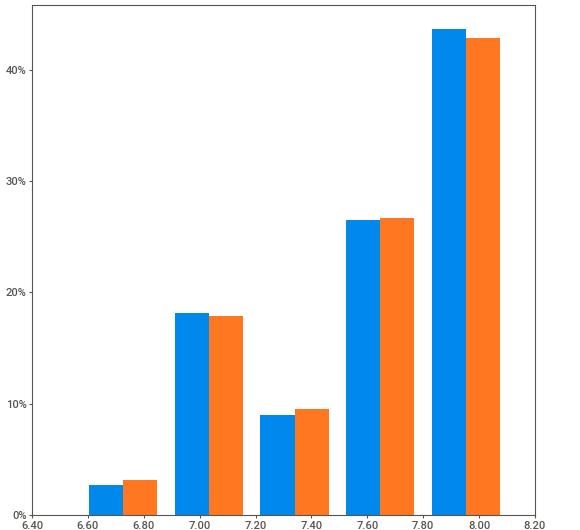
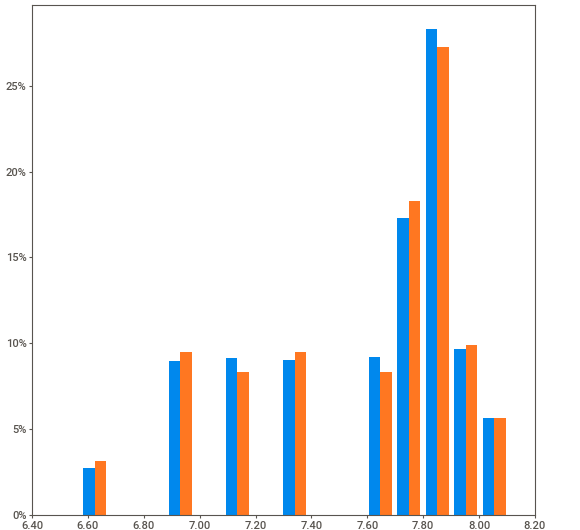
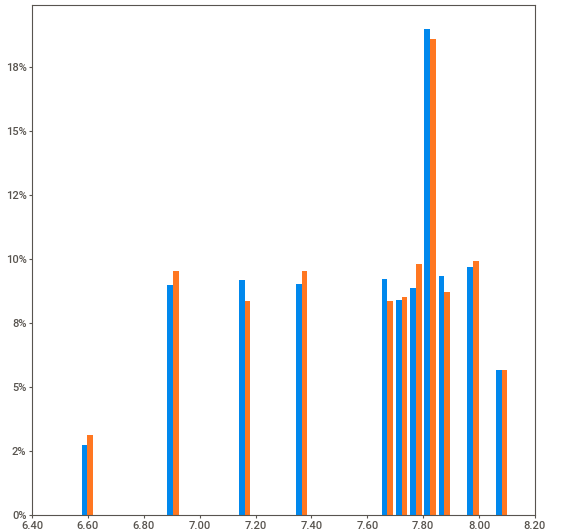
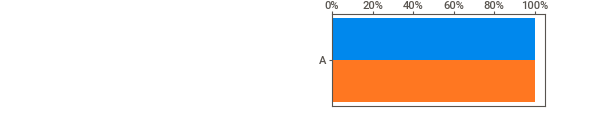
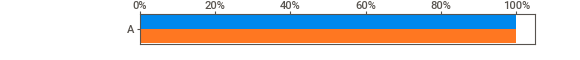
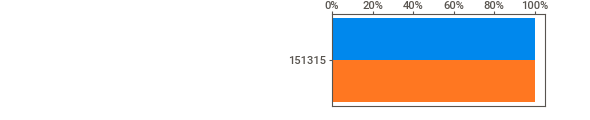
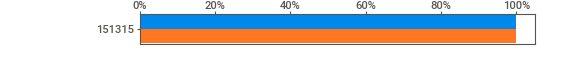
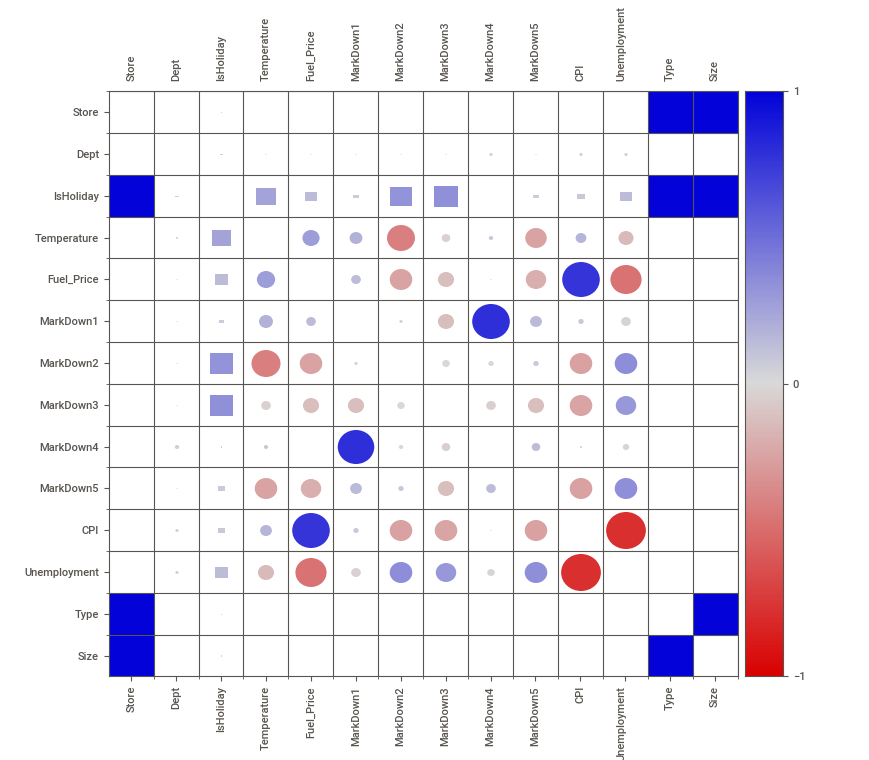
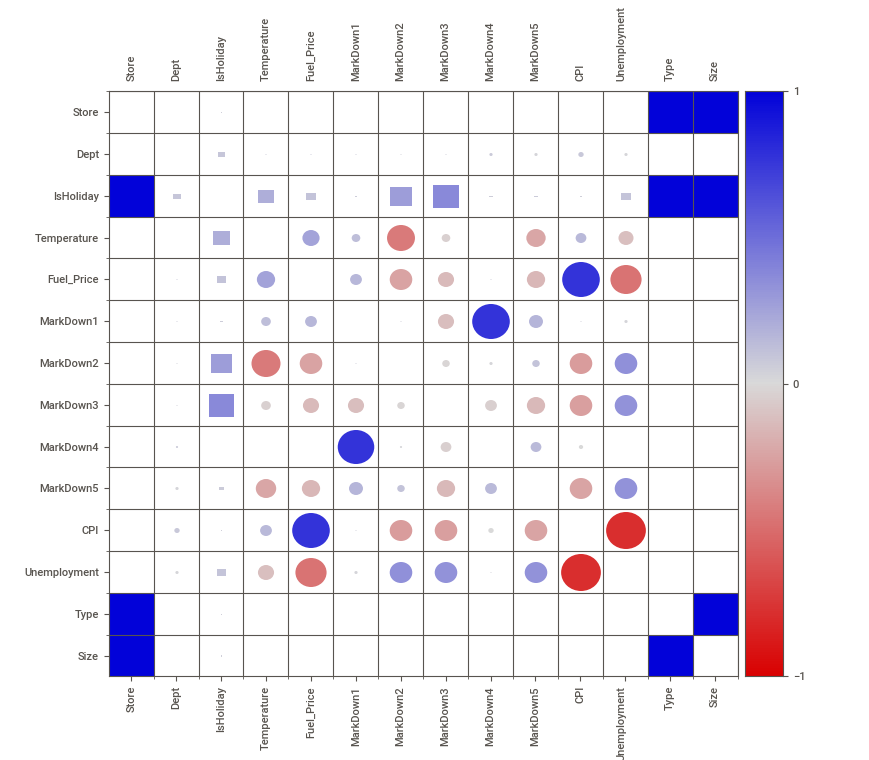

In [81]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_notebook()

## Note

- EDA, like other parts of machine learning, is an iterative process, NOT linear.
- This analysis is far from being comprehensive; rather it is a starting point. 
- There does not exist one "standard" way to perform EDA. You should always keep business objectives in mind and perform analysis as seen fit. It is one of those skills that grows with lots of practices.

## References

1. Original dataset is from [kaggle: wallmart sales forecast datasets](https://www.kaggle.com/datasets/iamprateek/wallmart-sales-forecast-datasets)
2. Notebook: [craking the walmart sales forecasting challenge](https://www.kaggle.com/code/fernandol/cracking-the-walmart-sales-forecasting-challenge)